In [85]:
import torch
from torchvision import transforms
import torch.nn.functional as F
from PIL import Image
from data_utils import train_loader_func
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
train_loader = train_loader_func()

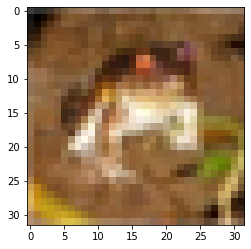

In [86]:
data = next(iter(train_loader))[0]
inp = data[0]
numpy_inp = inp.numpy().transpose((1, 2, 0))
plt.imshow(numpy_inp)

/home/vinteuil/ML_Env/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


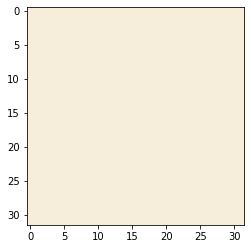

In [88]:
data = next(iter(train_loader))[0]
identity = torch.load("/home/vinteuil/Downloads/identity_theta(1).pt")
identity[0] *= torch.tensor([[0.0, -1.0, 0.0],[1.0, 0.0, 0.0]], dtype=torch.float)
grid = torch.tensor(F.affine_grid(identity, data.size()), dtype=torch.float)
data = F.grid_sample(data, grid)
inp = data[0]
numpy_inp = inp.numpy().transpose((1, 2, 0))
plt.imshow(numpy_inp)

In [1]:
from RotationTransformer import RotationTransformer
from rotation_classifier import RotationClassifier
import torch

In [2]:
RotationTransfomer = RotationTransformer()
RotationTransfomer.load_state_dict(torch.load("trained_transformer.pt"))
RotationClassifier = RotationClassifier()
RotationClassifier.load_state_dict(torch.load("trained_discriminator.pt"))

<All keys matched successfully>

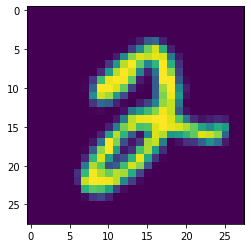

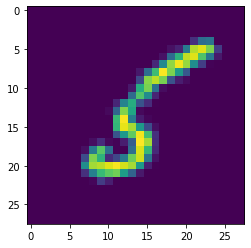

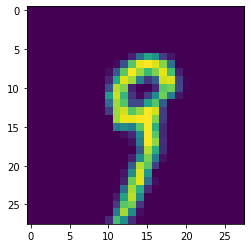

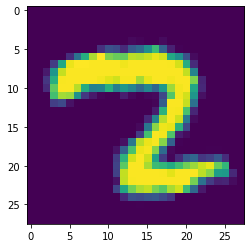

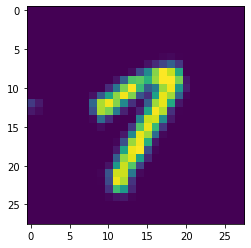

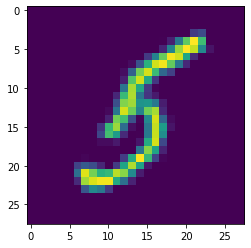

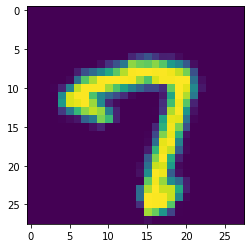

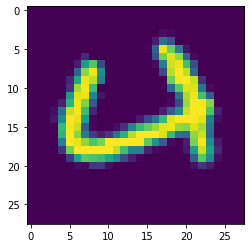

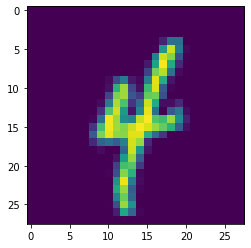

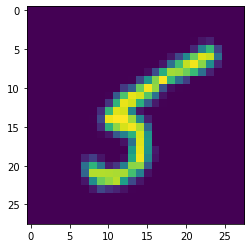

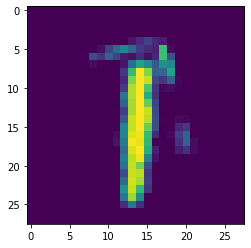

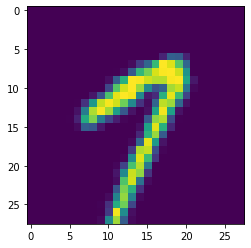

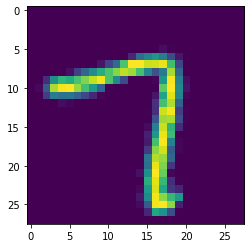

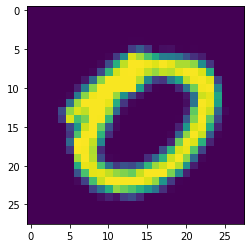

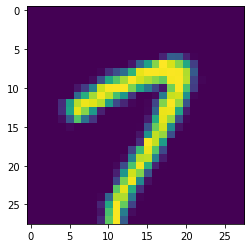

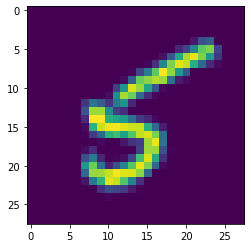

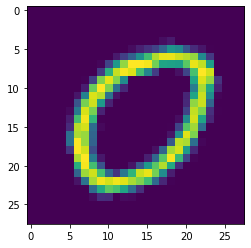

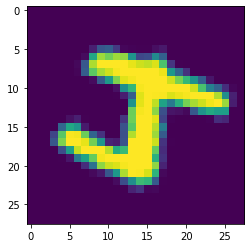

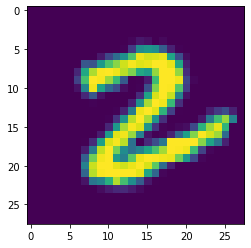

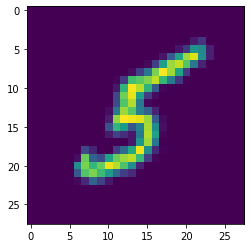

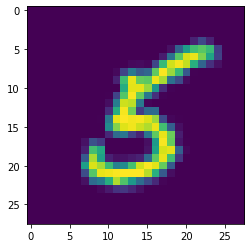

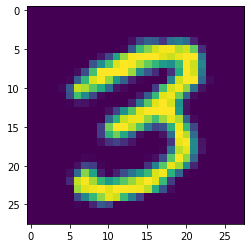

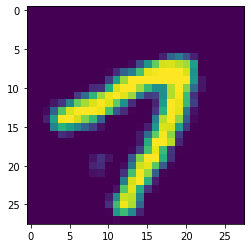

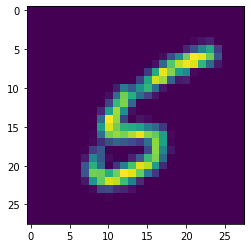

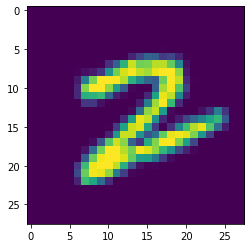

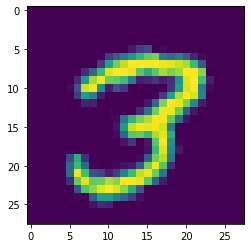

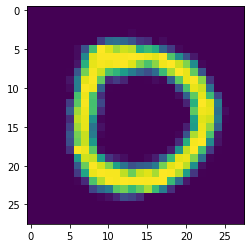

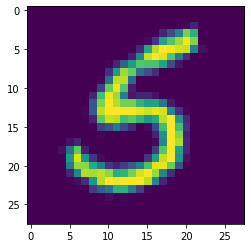

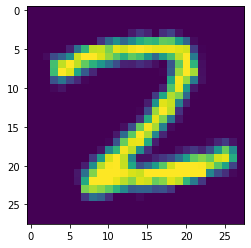

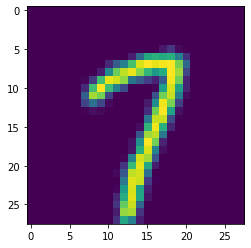

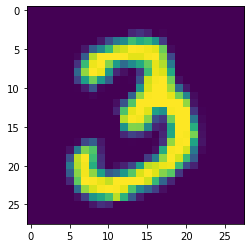

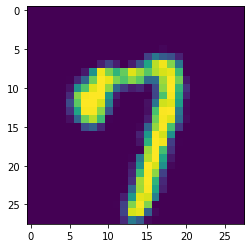

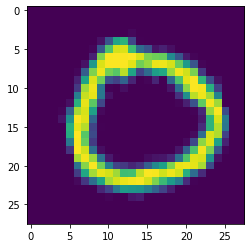

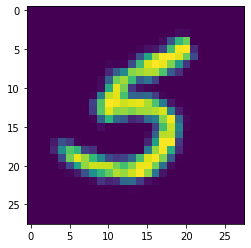

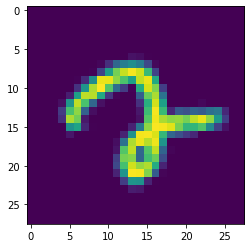

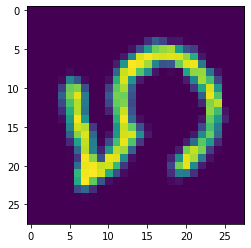

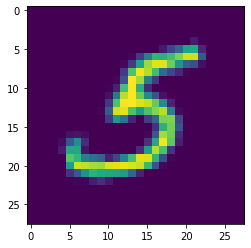

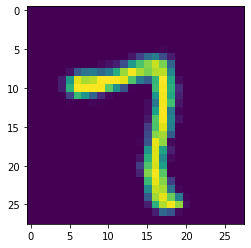

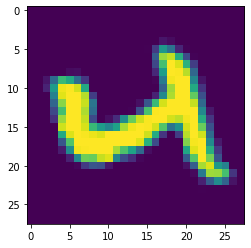

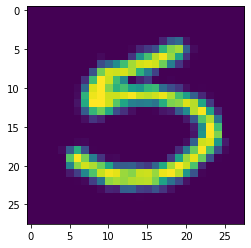

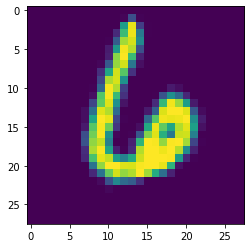

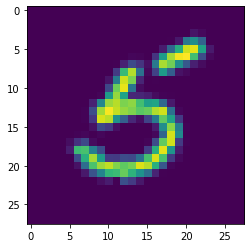

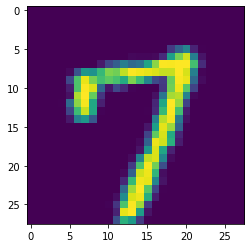

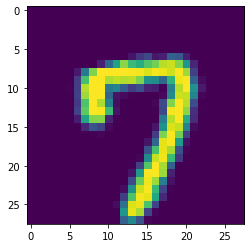

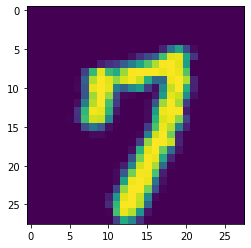

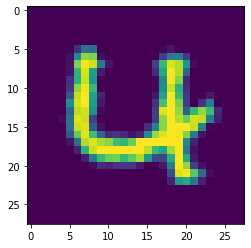

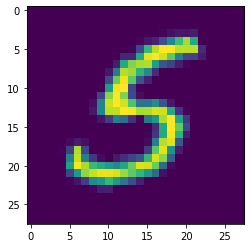

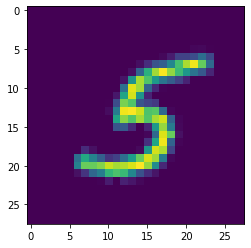

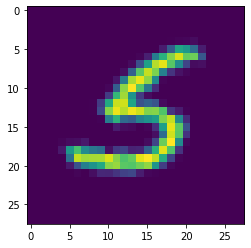

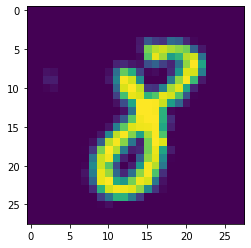

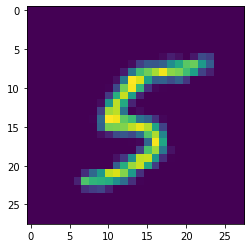

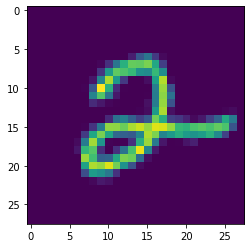

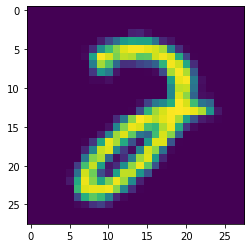

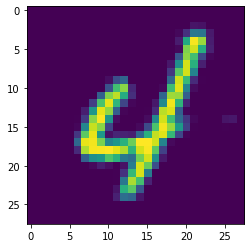

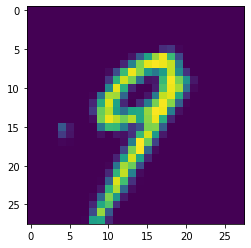

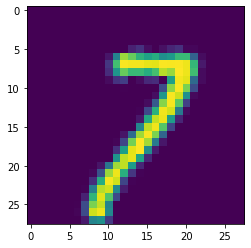

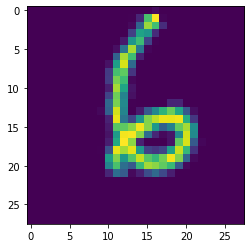

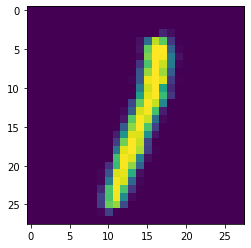

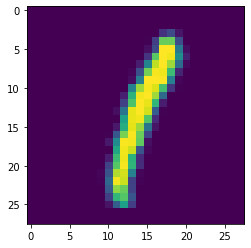

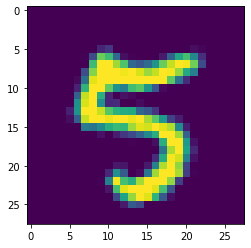

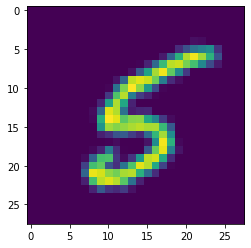

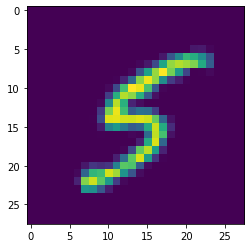

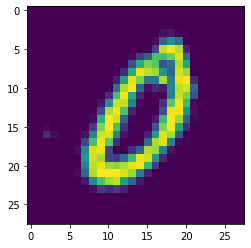

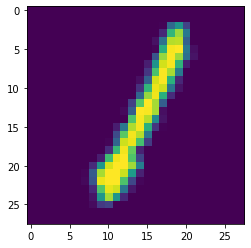

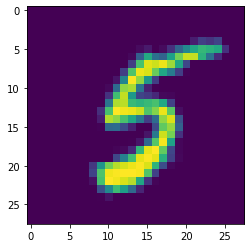

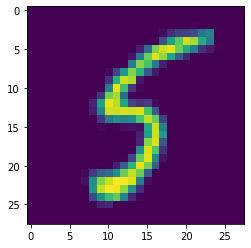

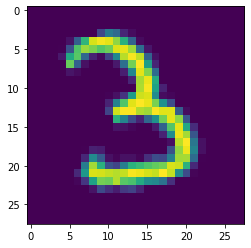

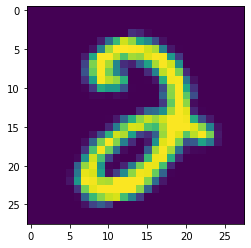

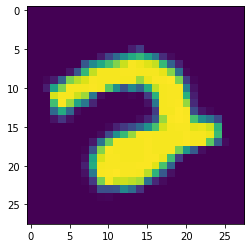

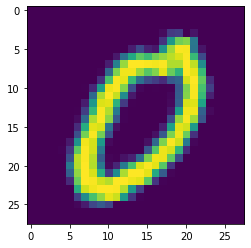

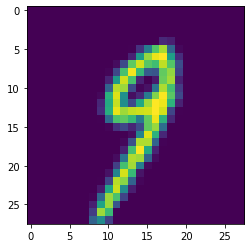

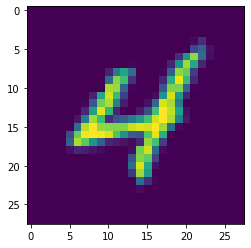

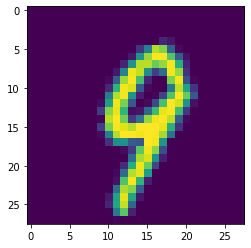

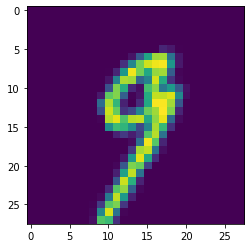

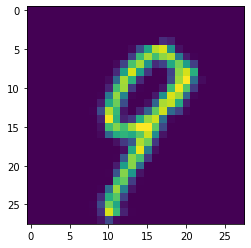

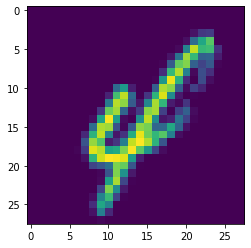

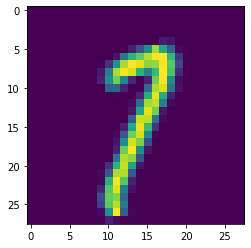

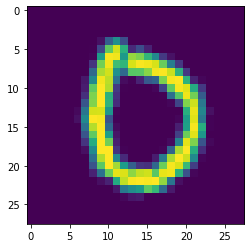

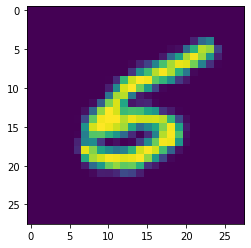

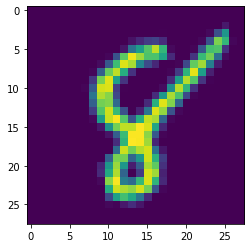

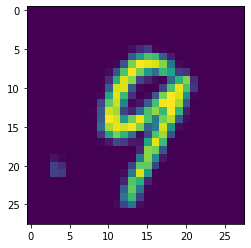

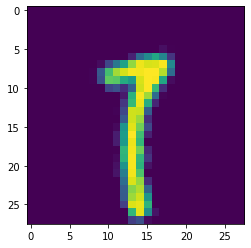

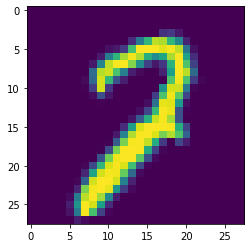

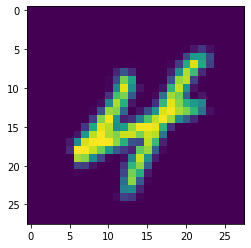

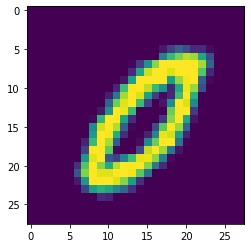

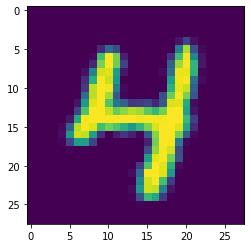

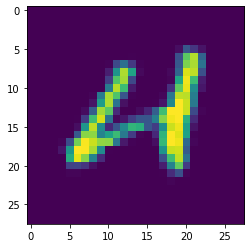

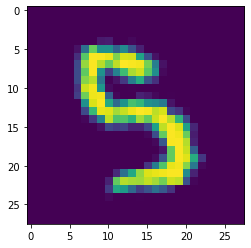

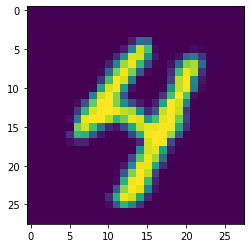

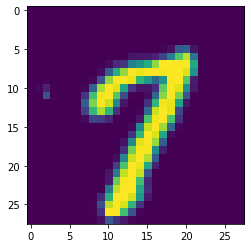

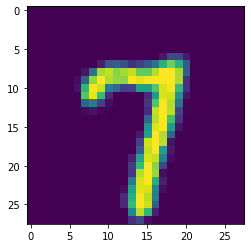

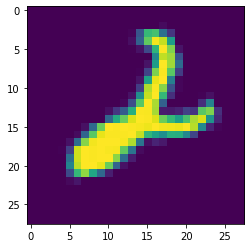

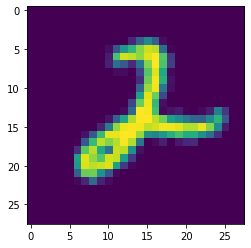

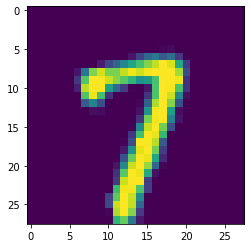

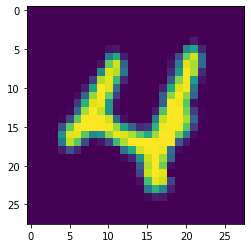

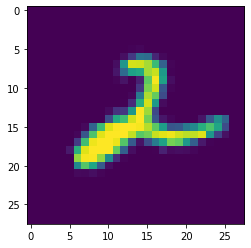

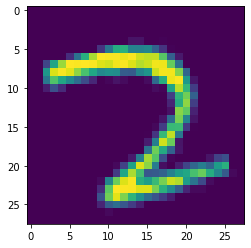

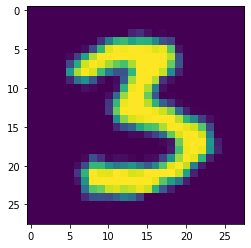

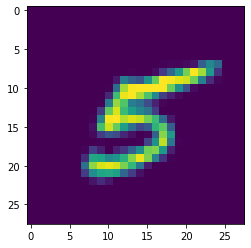

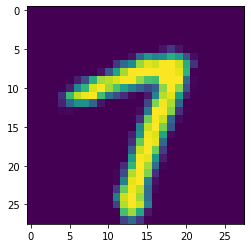

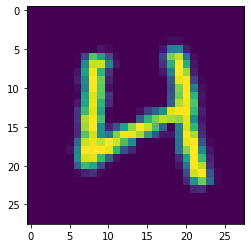

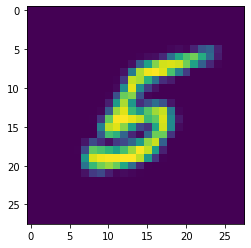

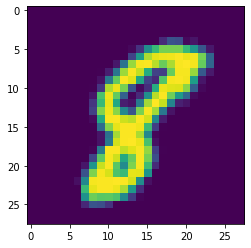

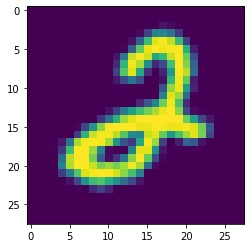

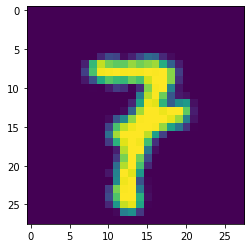

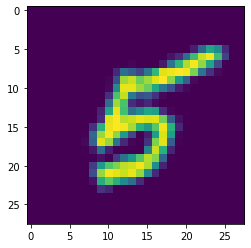

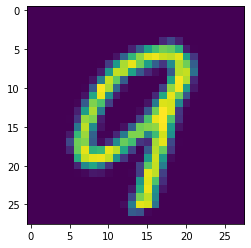

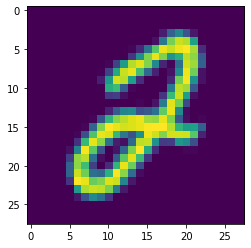

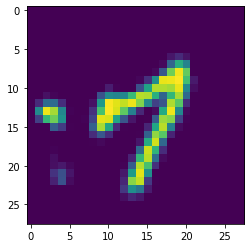

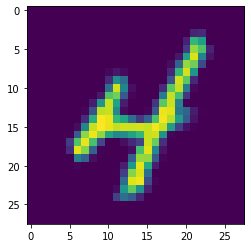

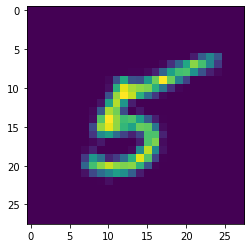

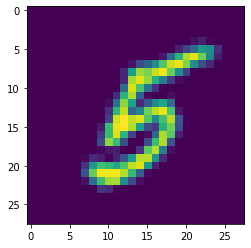

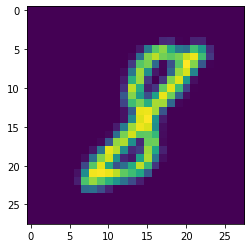

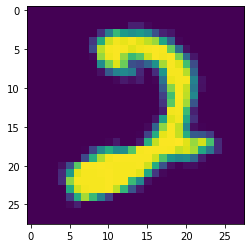

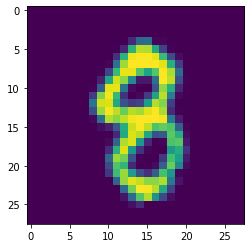

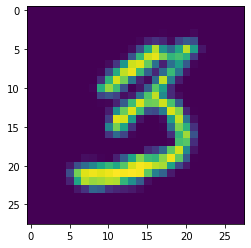

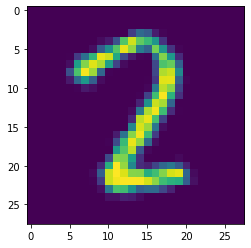

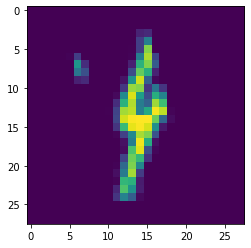

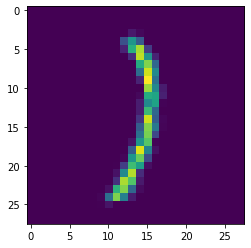

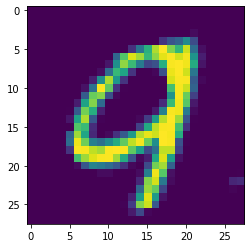

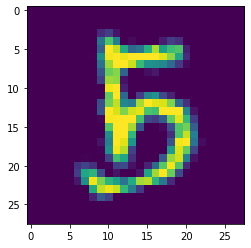

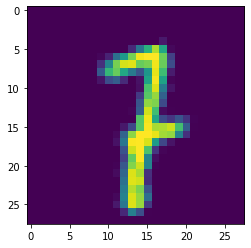

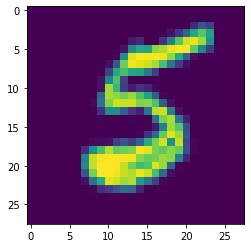

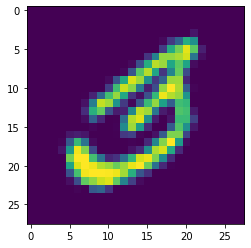

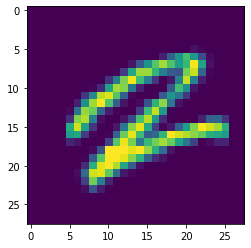

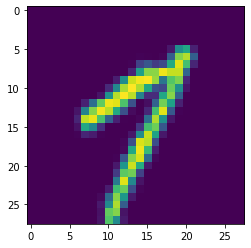

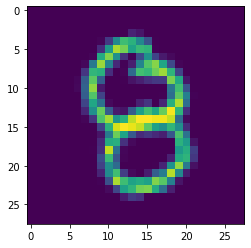

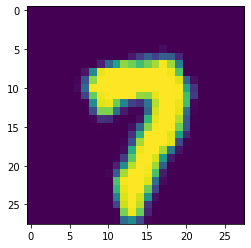

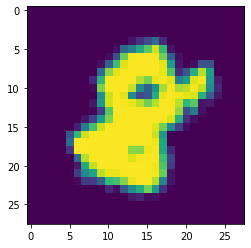

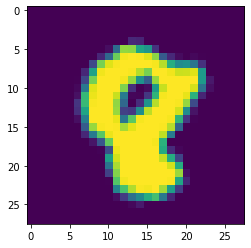

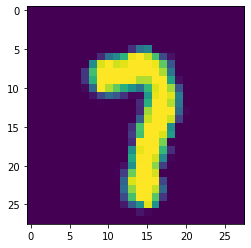

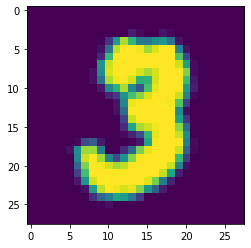

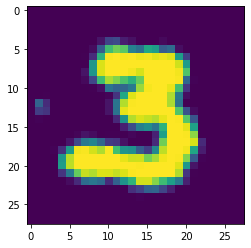

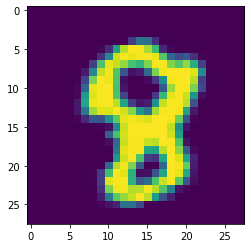

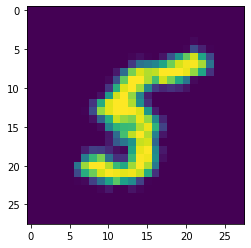

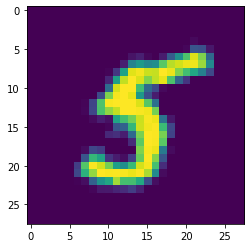

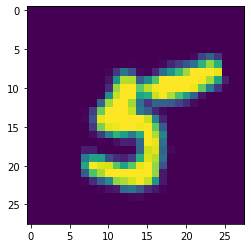

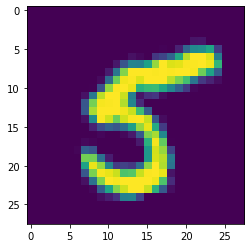

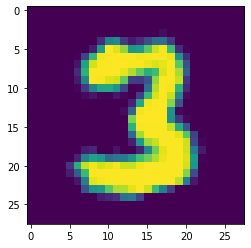

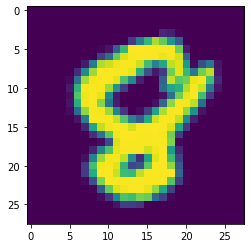

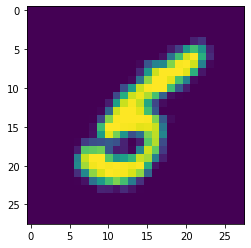

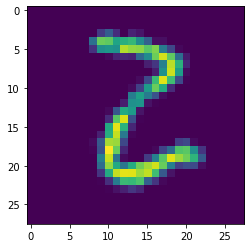

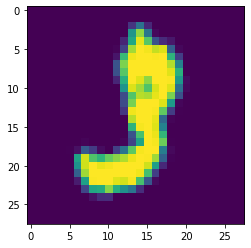

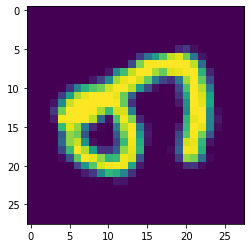

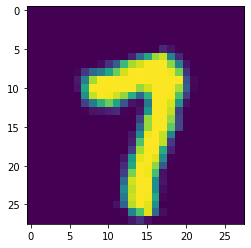

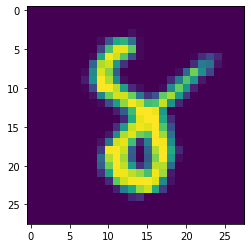

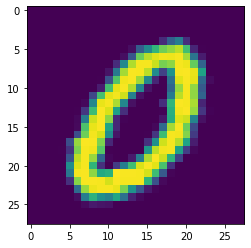

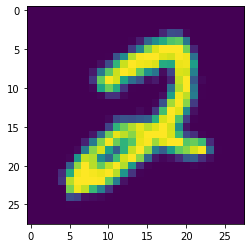

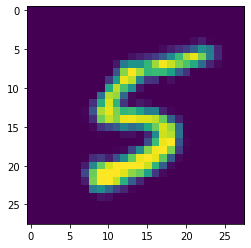

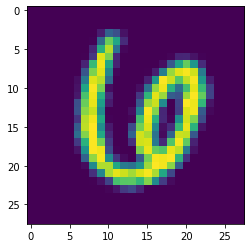

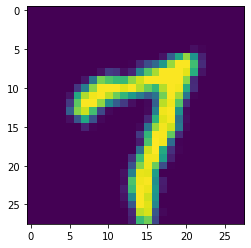

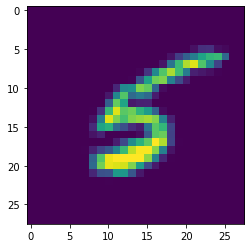

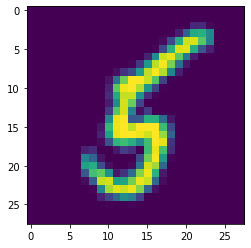

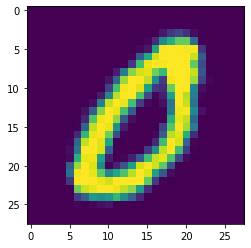

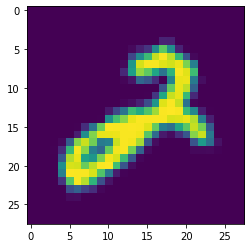

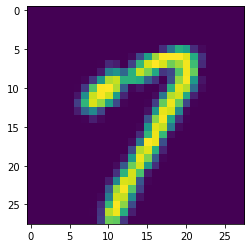

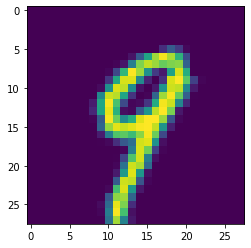

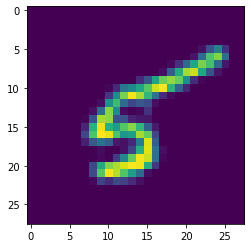

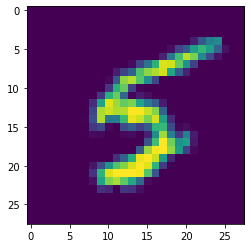

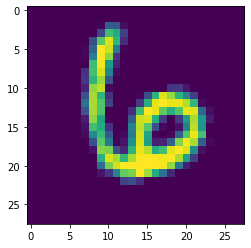

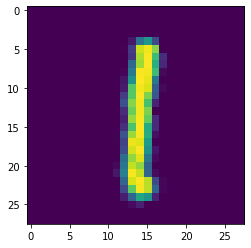

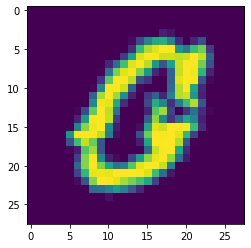

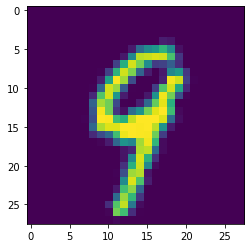

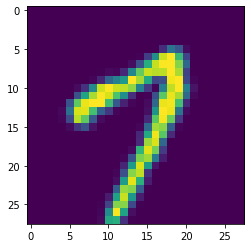

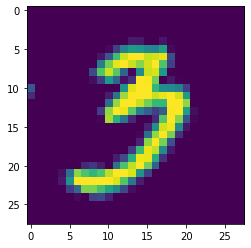

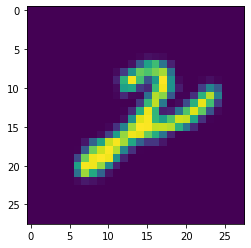

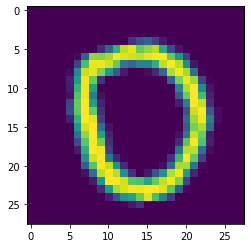

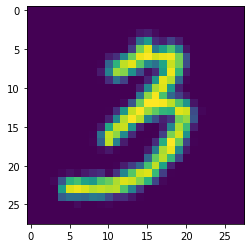

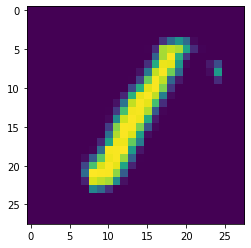

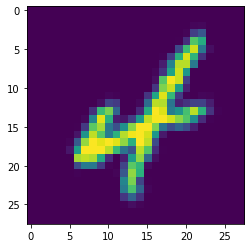

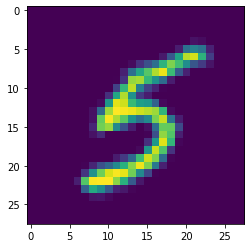

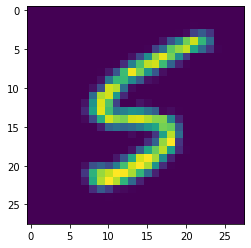

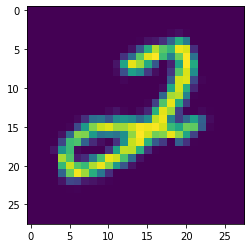

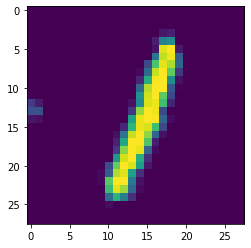

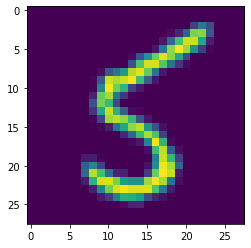

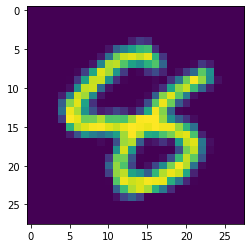

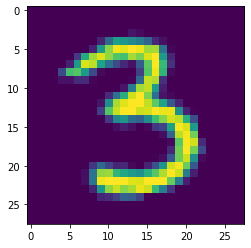

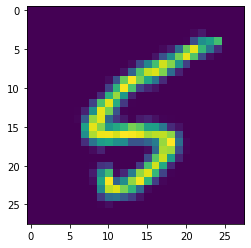

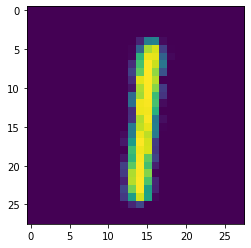

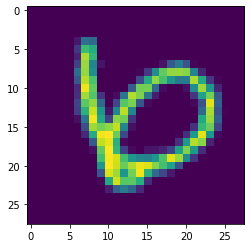

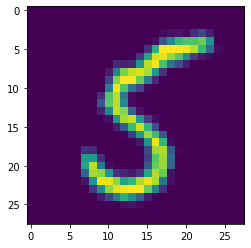

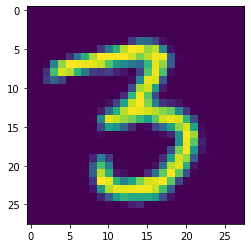

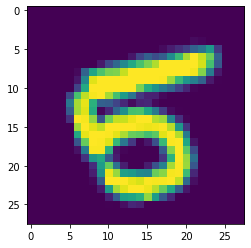

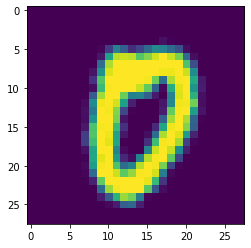

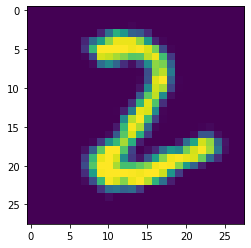

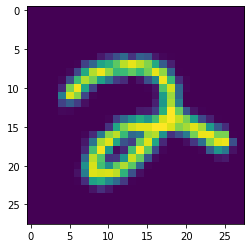

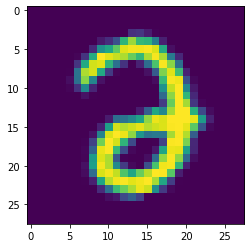

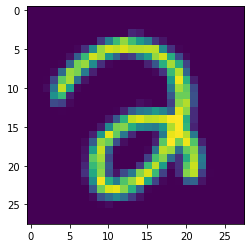

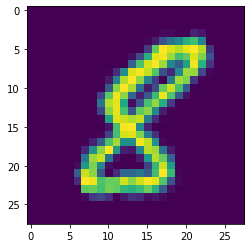

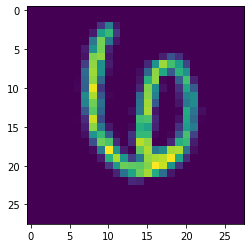

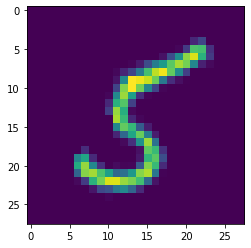

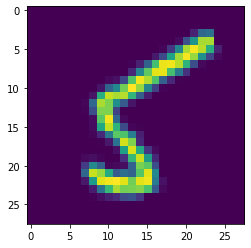

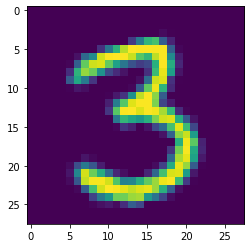

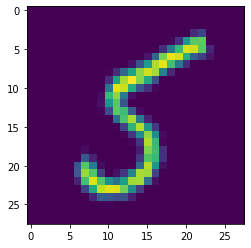

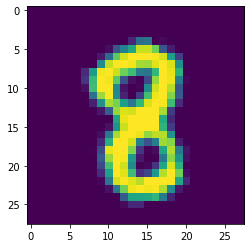

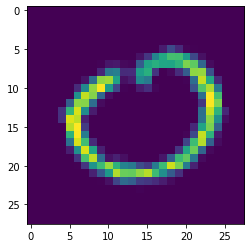

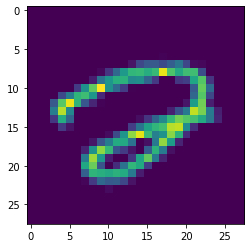

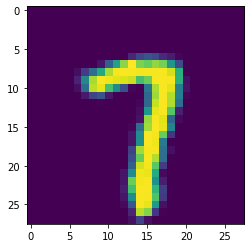

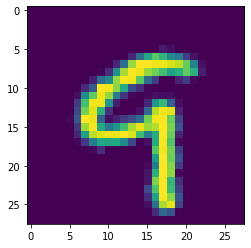

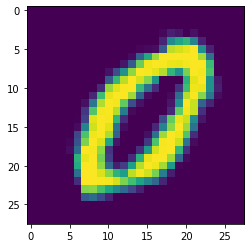

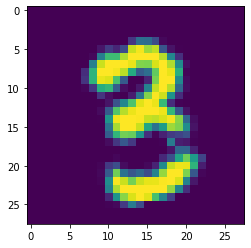

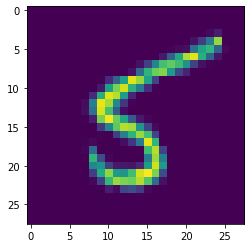

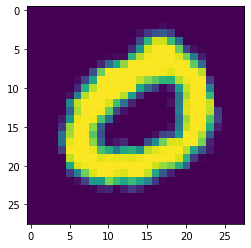

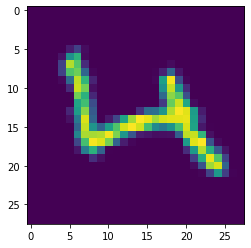

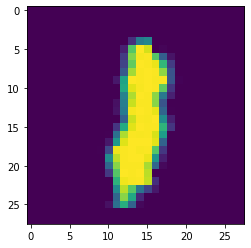

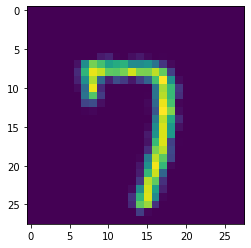

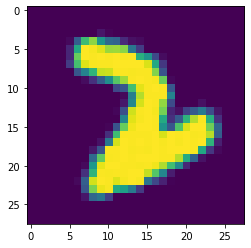

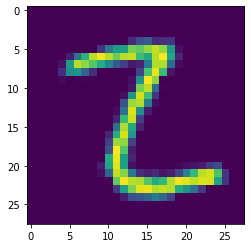

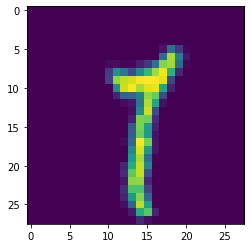

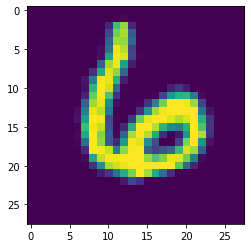

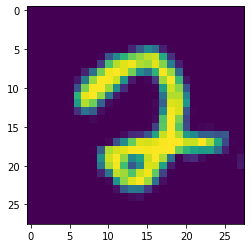

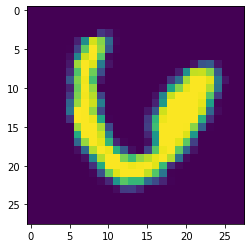

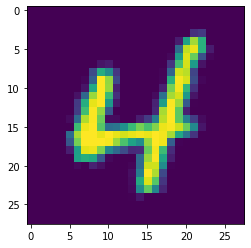

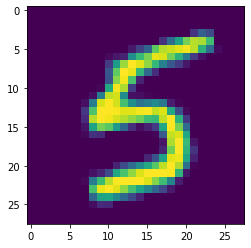

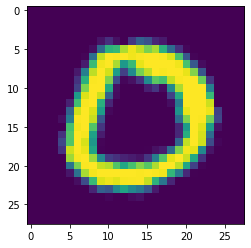

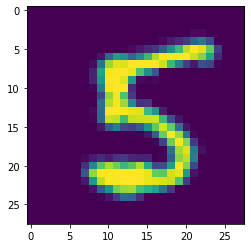

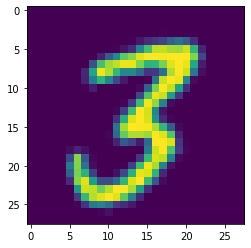

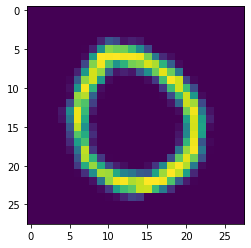

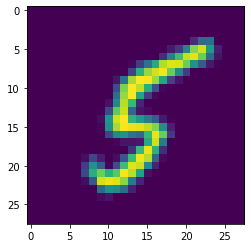

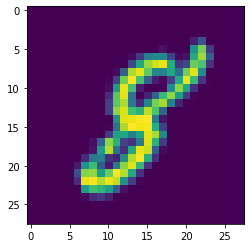

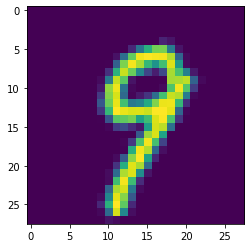

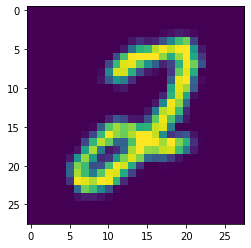

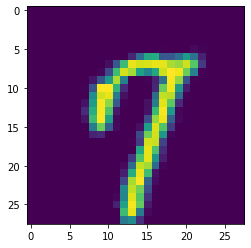

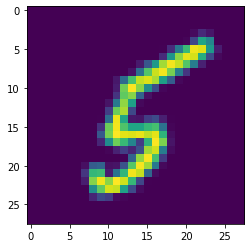

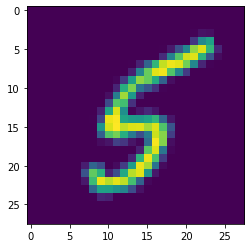

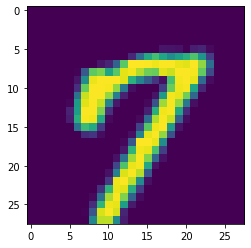

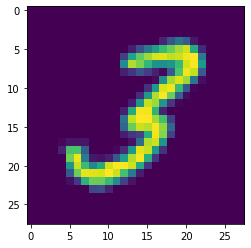

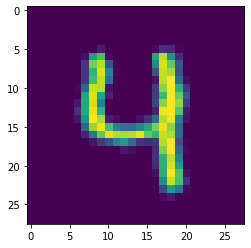

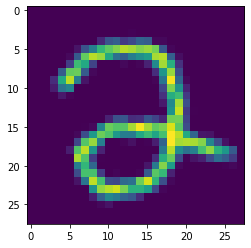

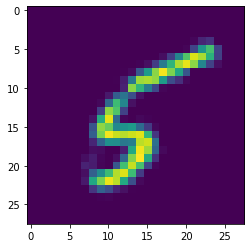

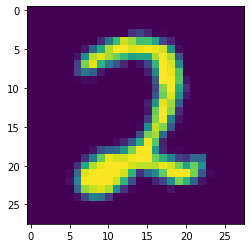

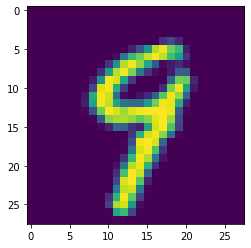

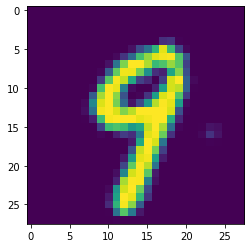

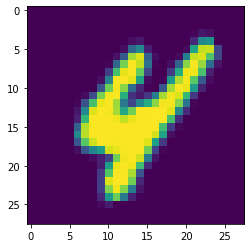

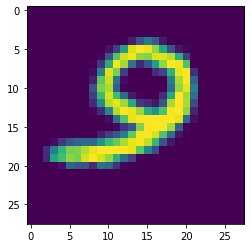

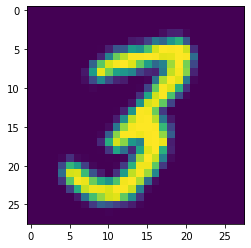

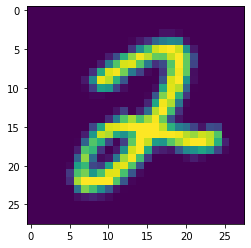

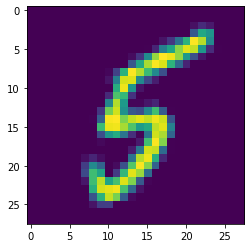

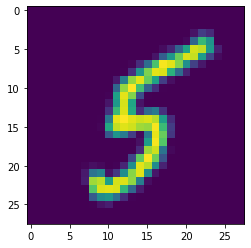

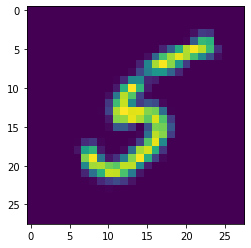

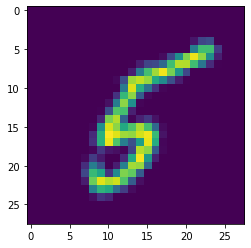

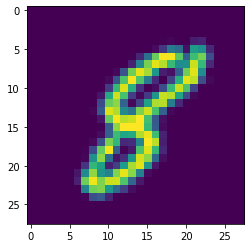

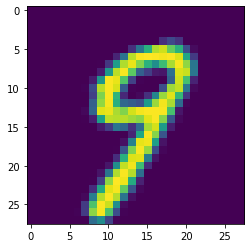

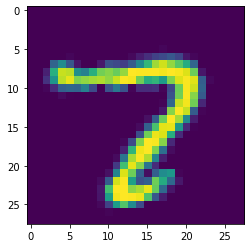

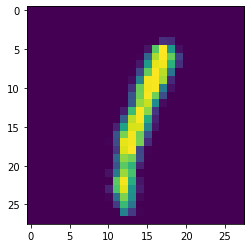

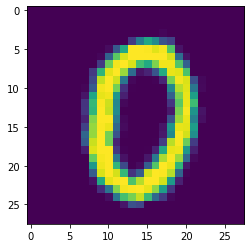

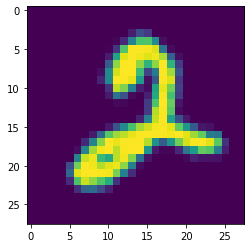

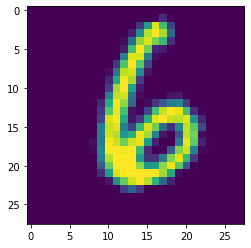

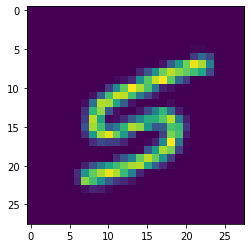

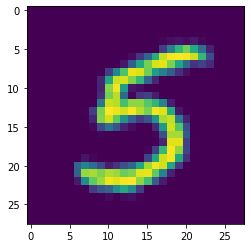

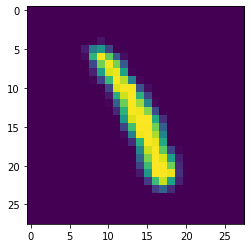

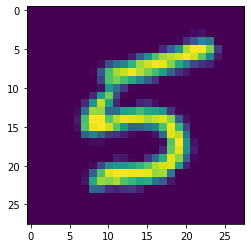

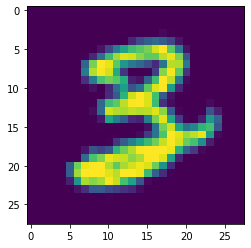

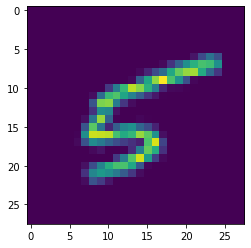

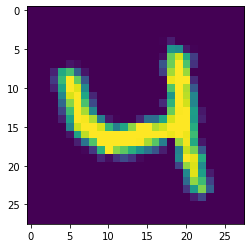

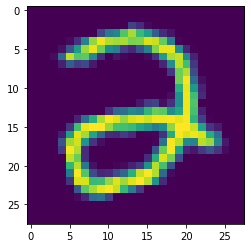

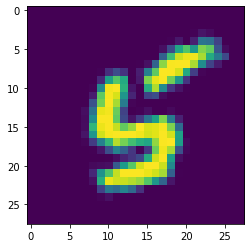

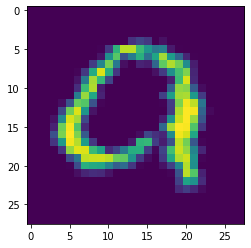

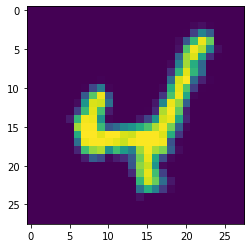

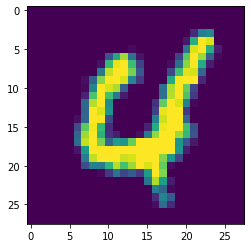

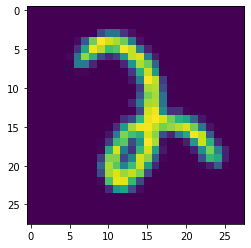

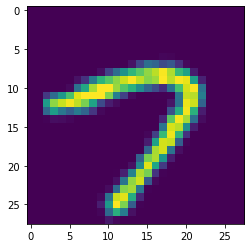

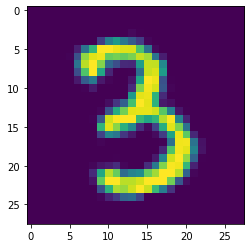

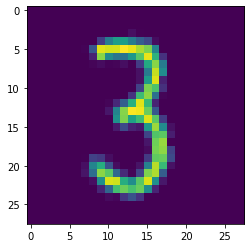

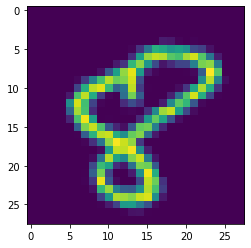

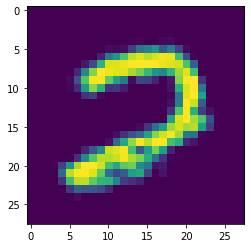

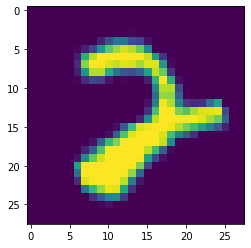

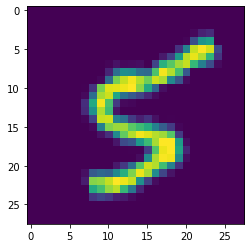

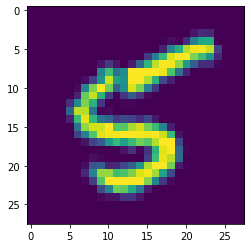

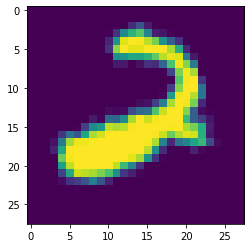

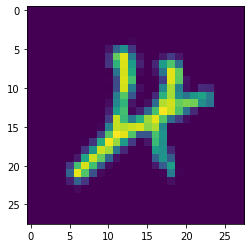

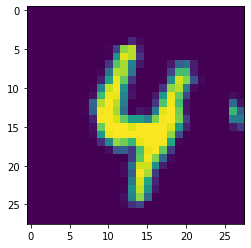

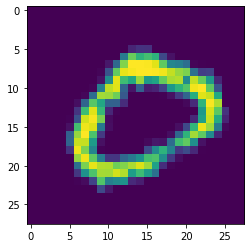

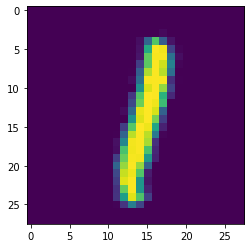

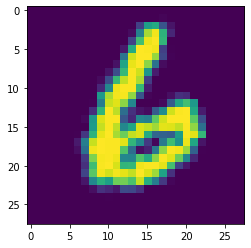

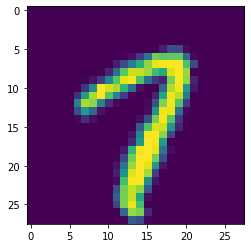

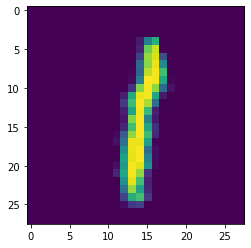

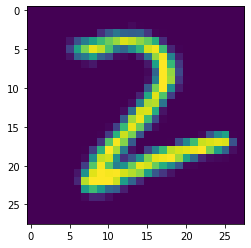

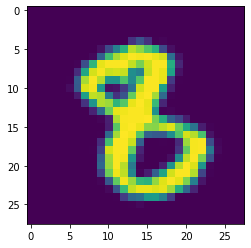

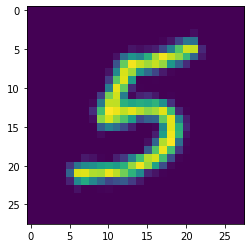

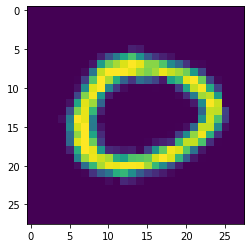

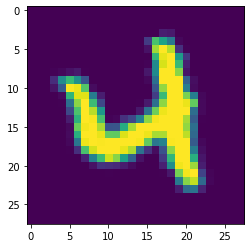

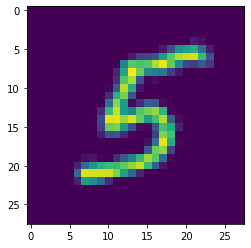

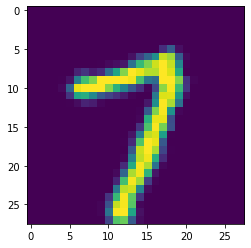

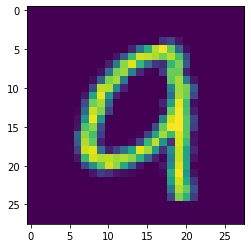

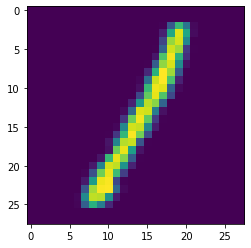

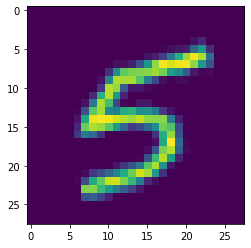

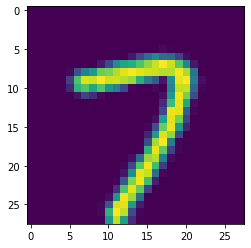

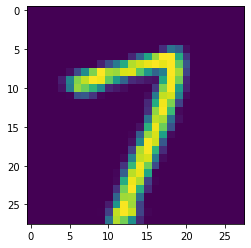

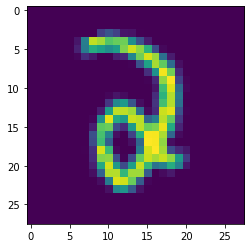

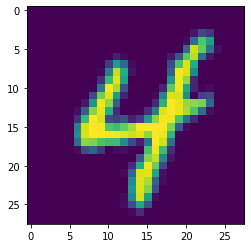

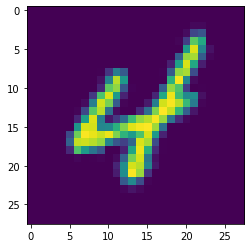

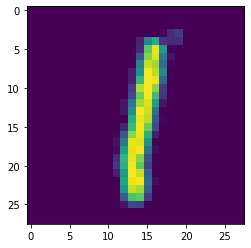

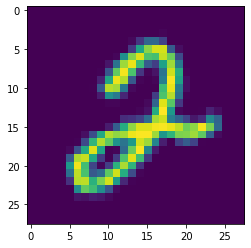

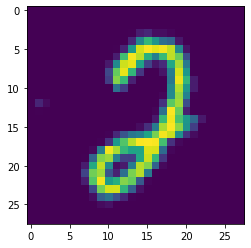

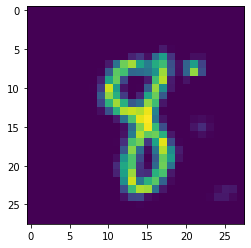

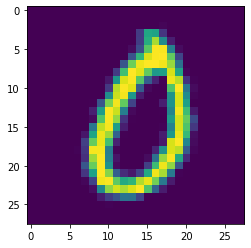

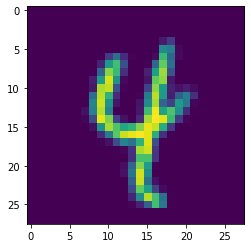

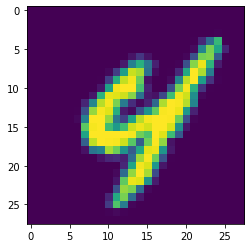

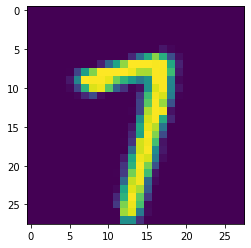

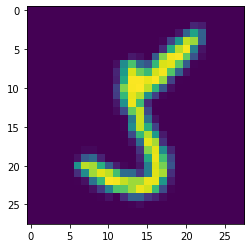

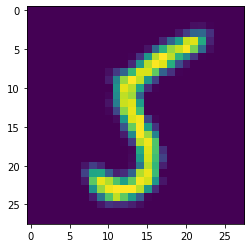

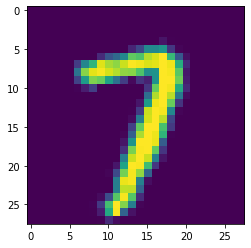

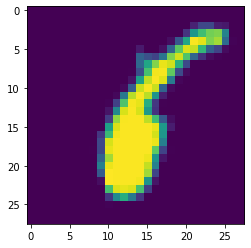

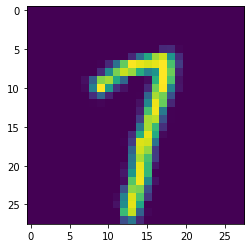

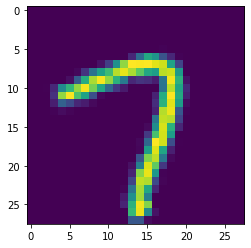

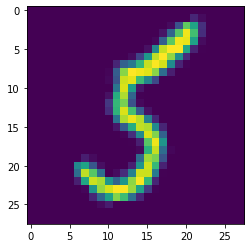

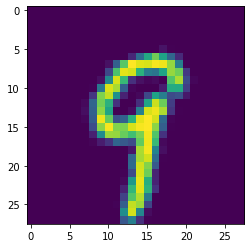

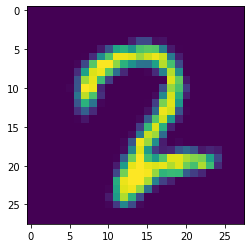

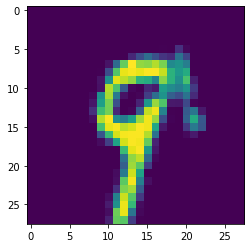

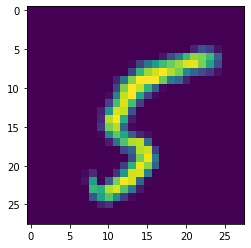

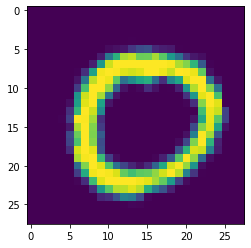

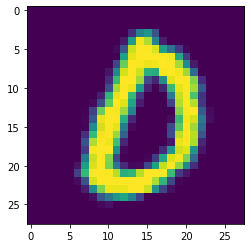

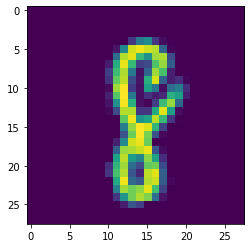

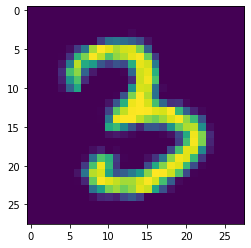

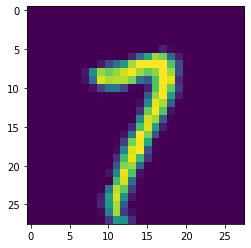

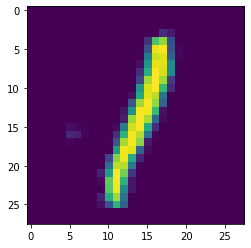

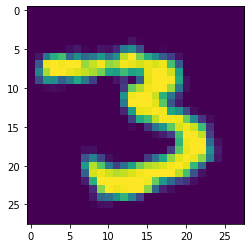

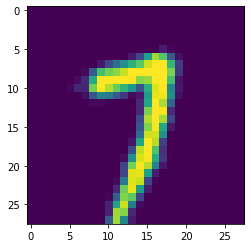

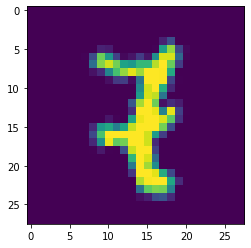

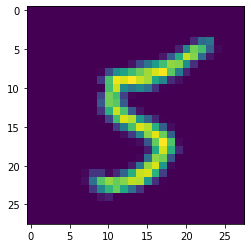

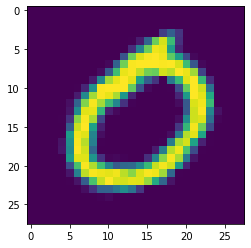

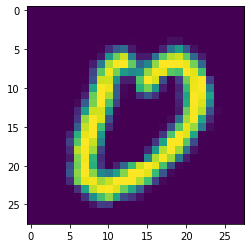

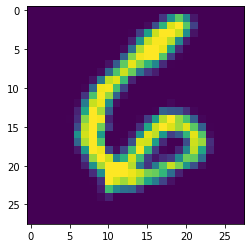

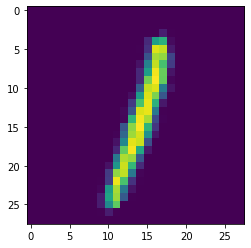

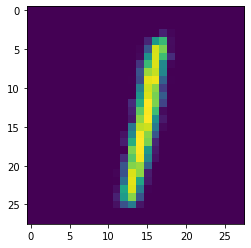

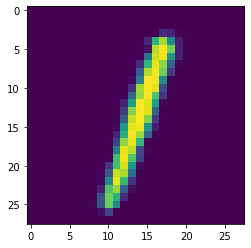

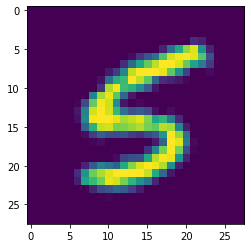

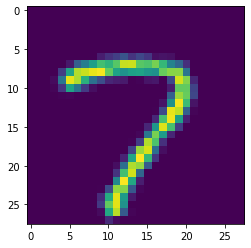

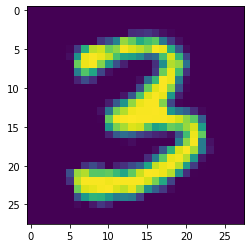

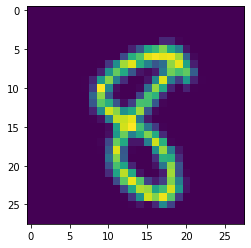

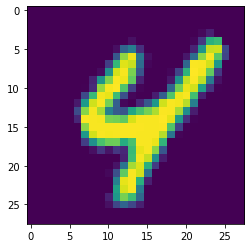

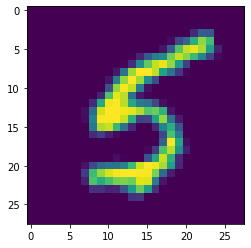

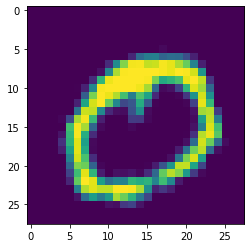

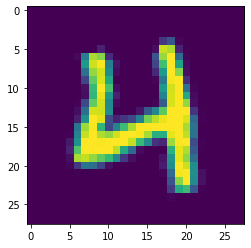

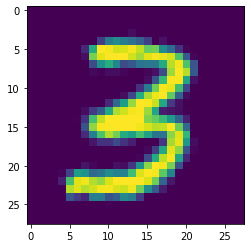

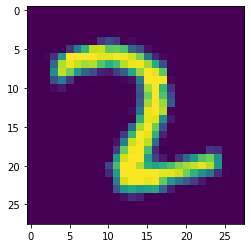

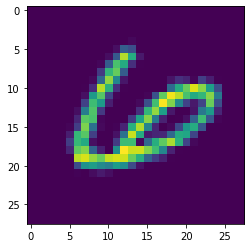

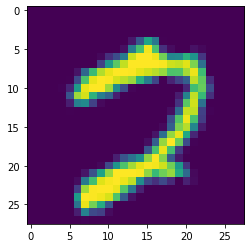

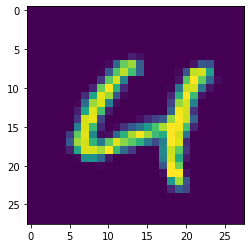

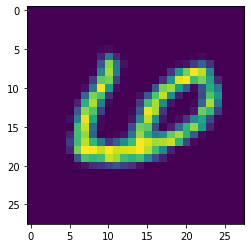

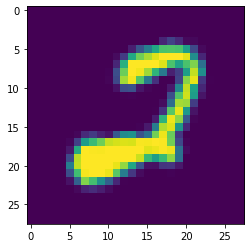

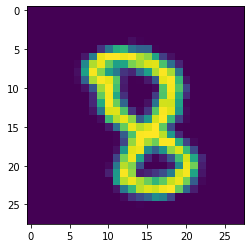

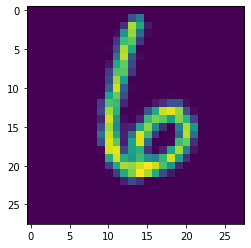

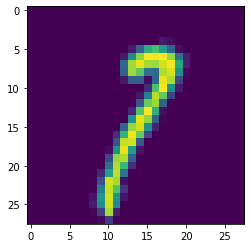

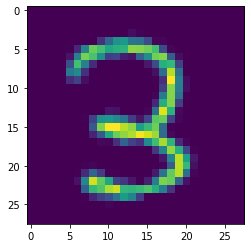

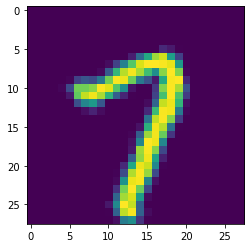

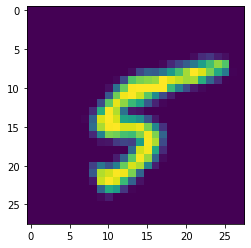

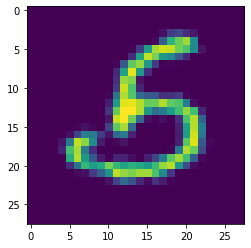

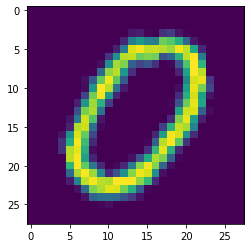

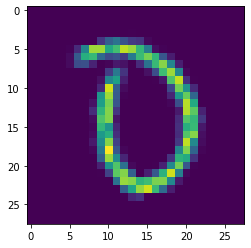

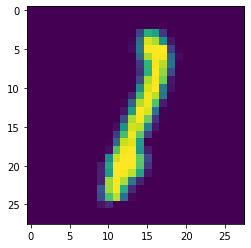

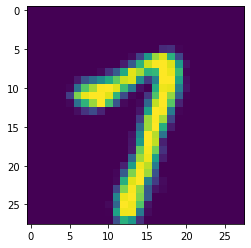

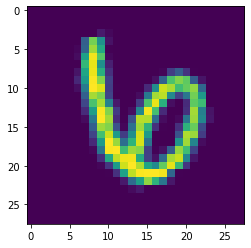

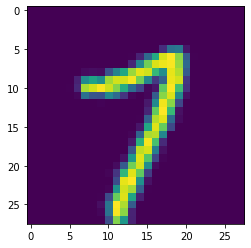

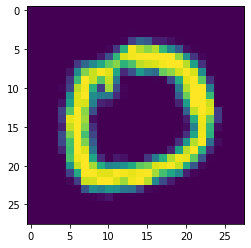

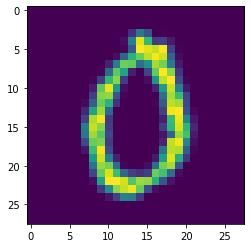

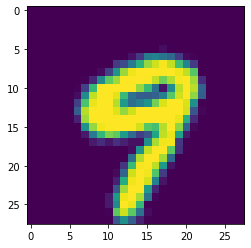

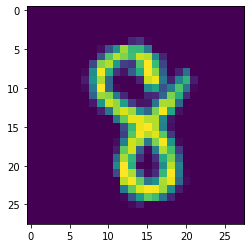

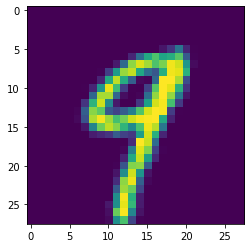

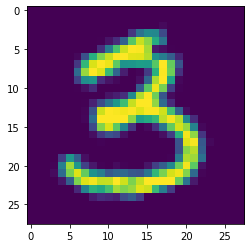

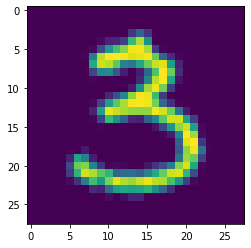

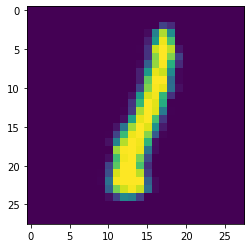

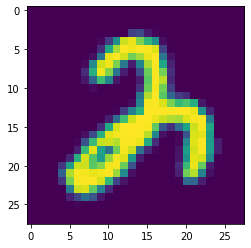

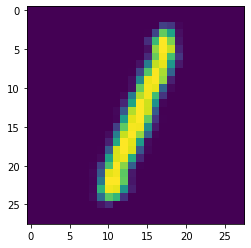

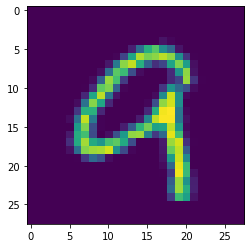

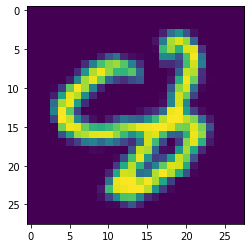

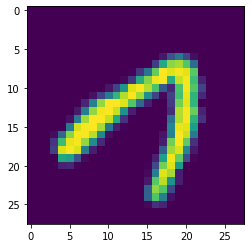

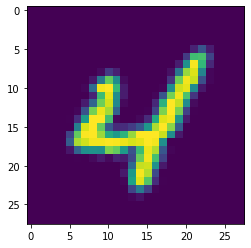

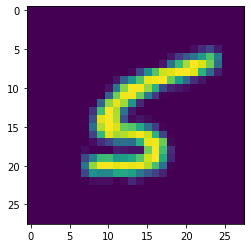

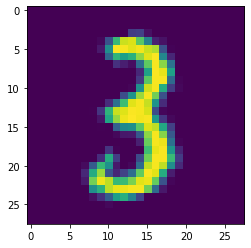

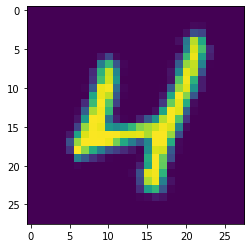

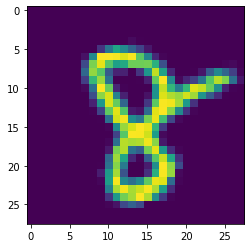

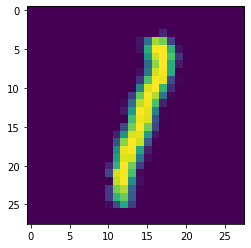

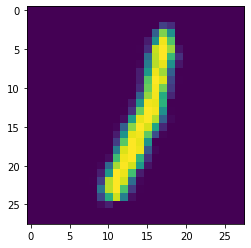

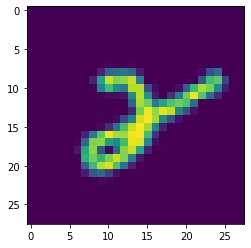

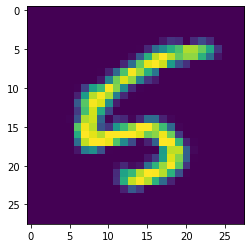

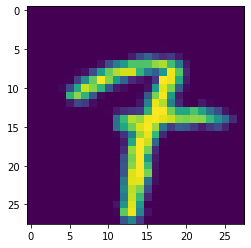

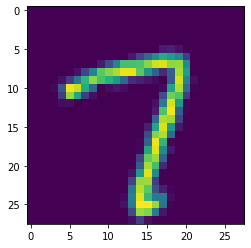

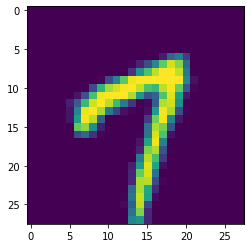

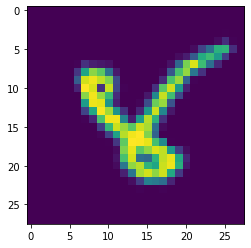

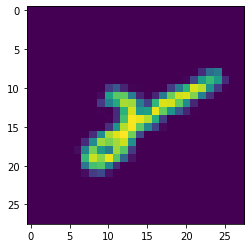

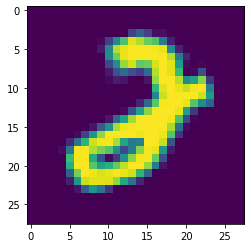

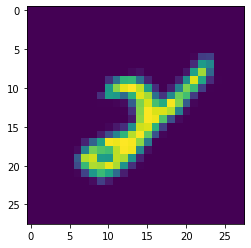

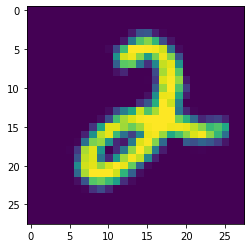

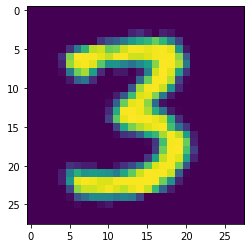

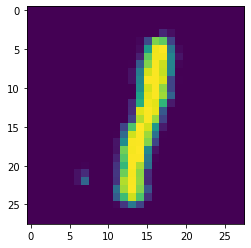

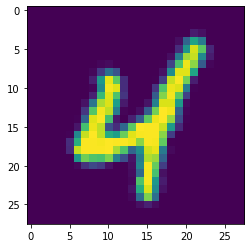

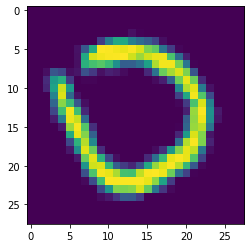

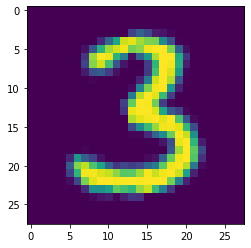

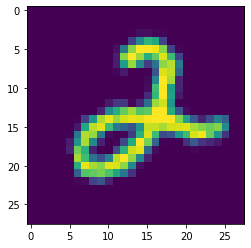

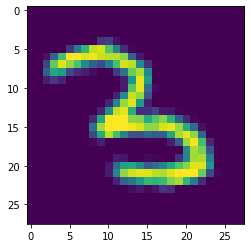

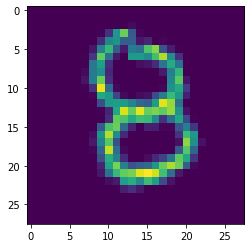

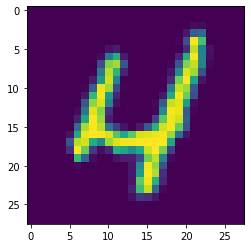

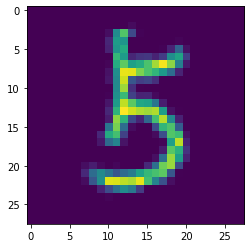

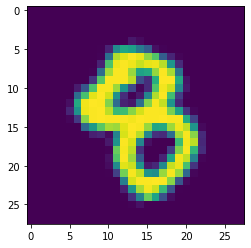

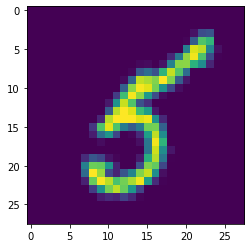

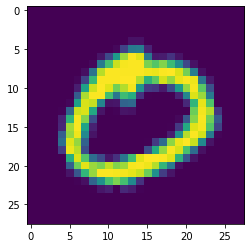

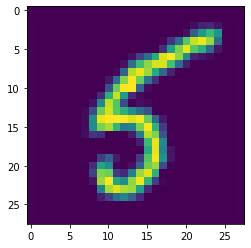

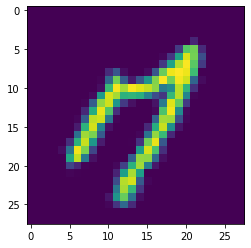

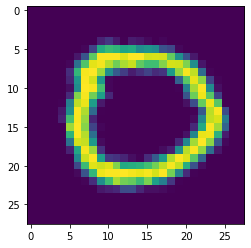

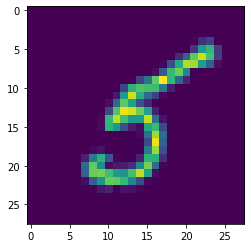

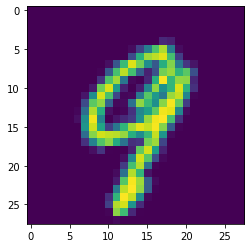

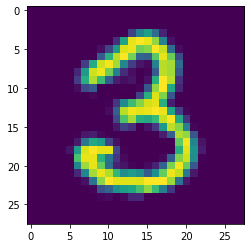

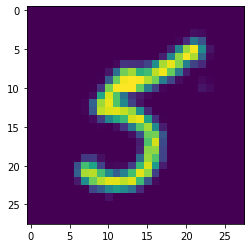

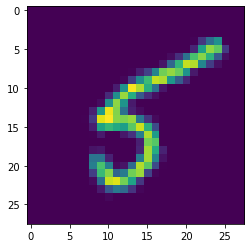

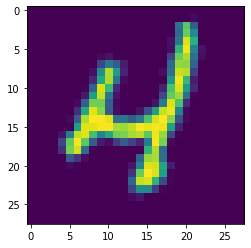

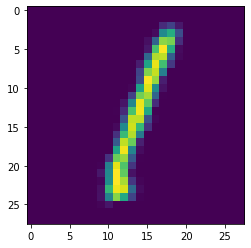

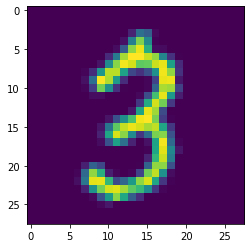

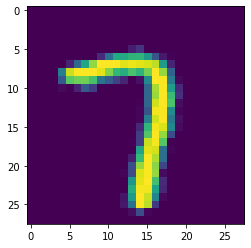

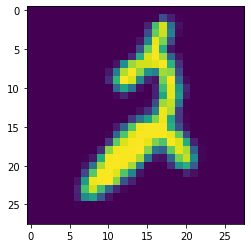

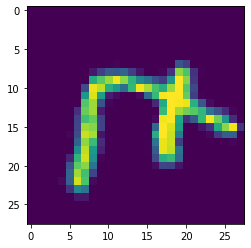

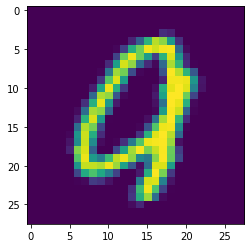

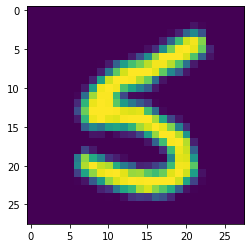

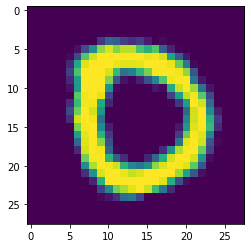

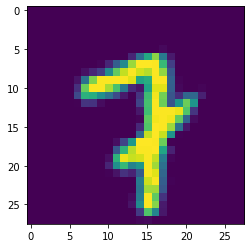

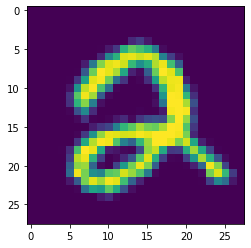

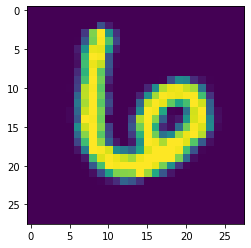

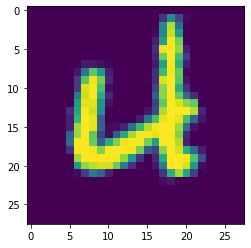

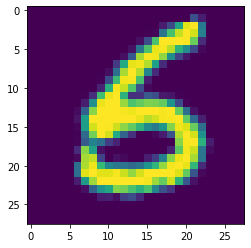

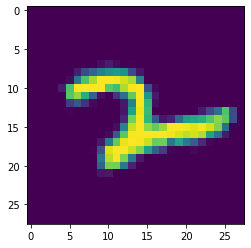

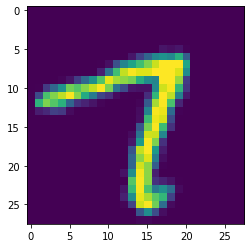

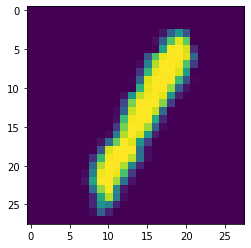

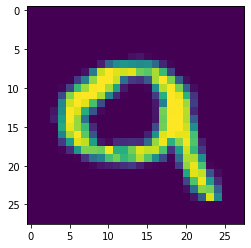

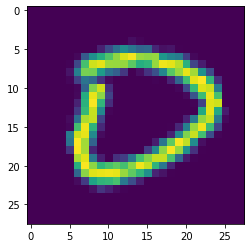

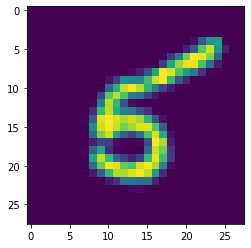

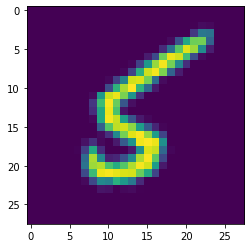

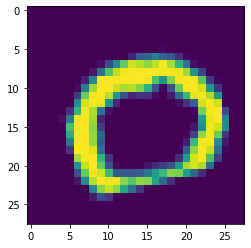

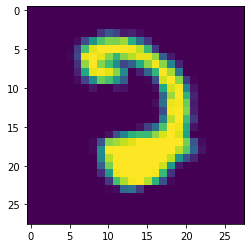

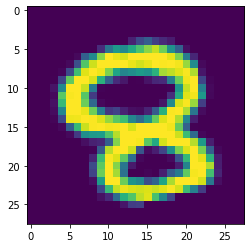

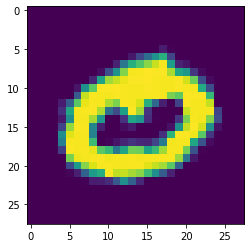

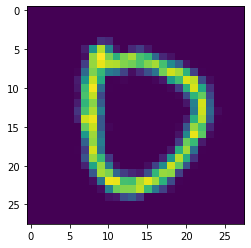

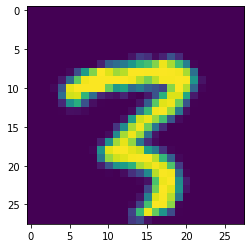

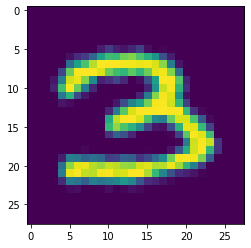

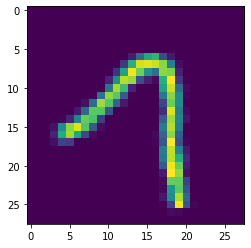

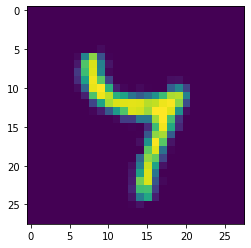

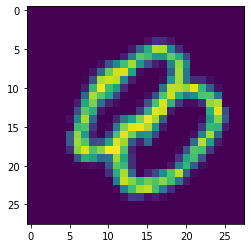

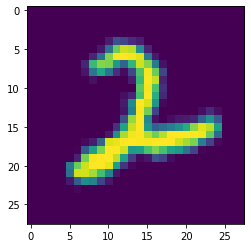

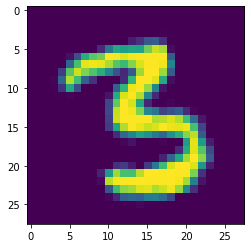

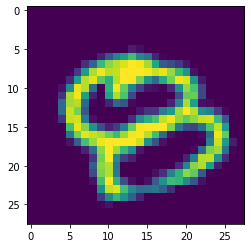

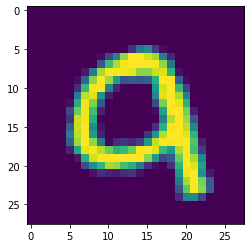

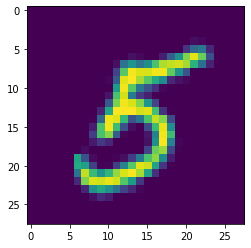

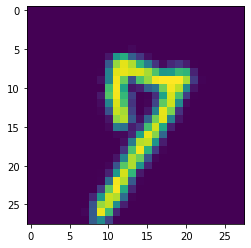

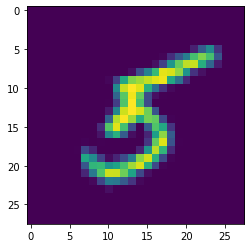

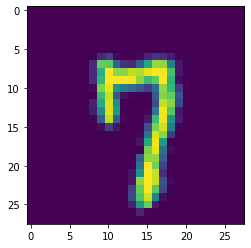

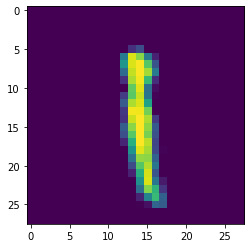

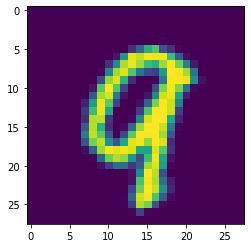

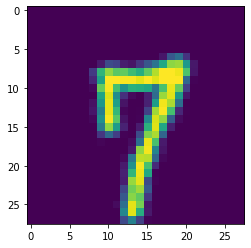

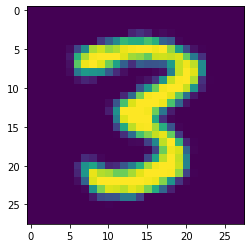

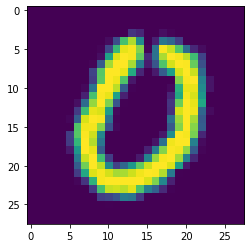

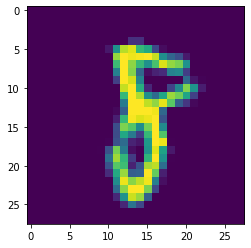

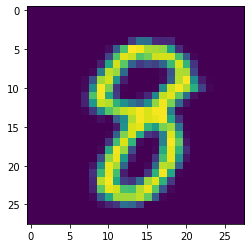

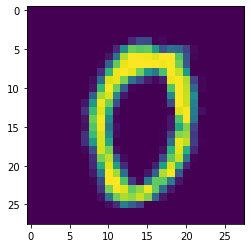

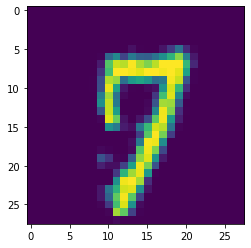

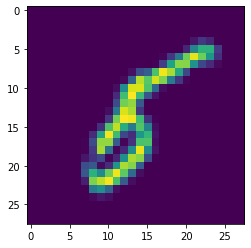

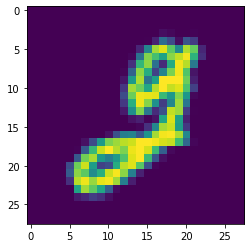

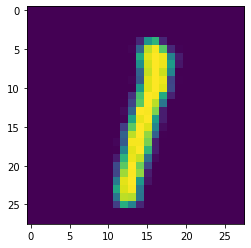

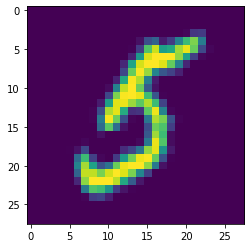

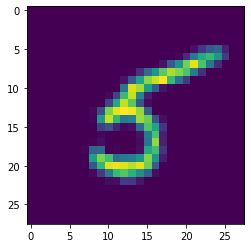

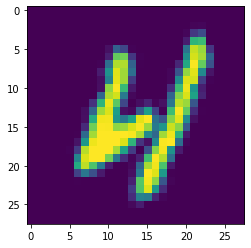

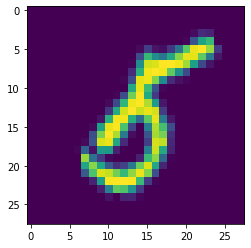

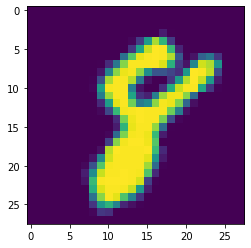

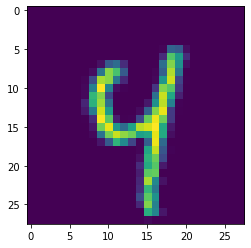

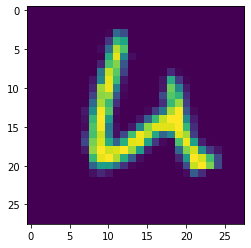

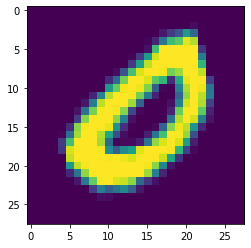

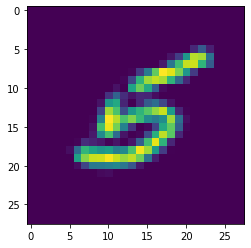

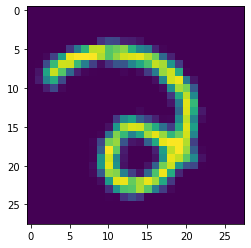

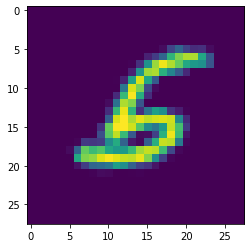

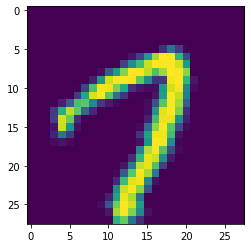

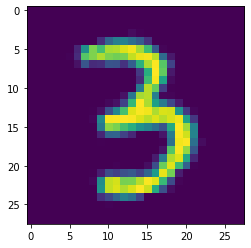

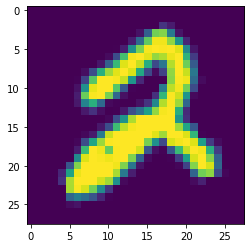

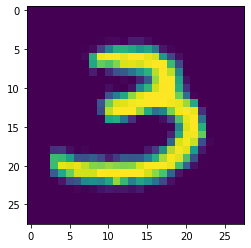

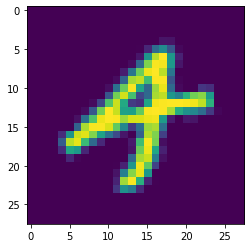

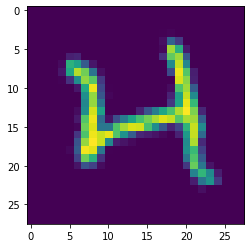

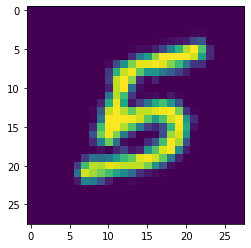

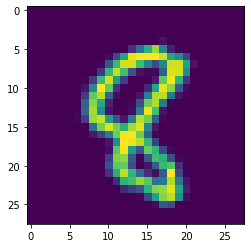

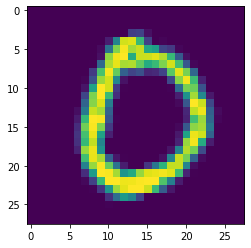

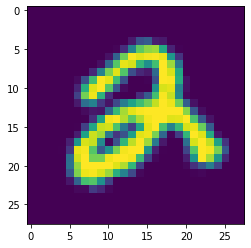

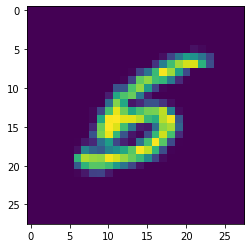

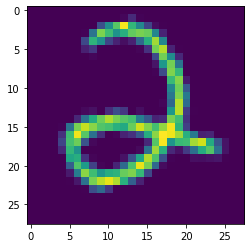

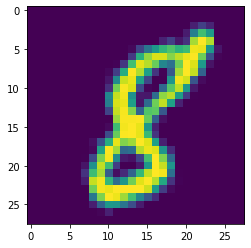

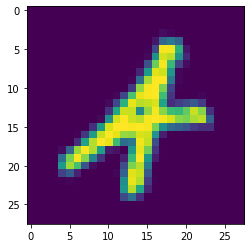

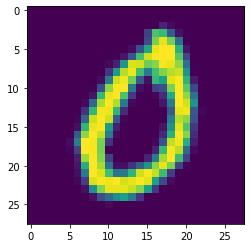

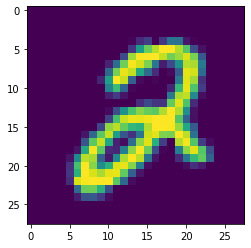

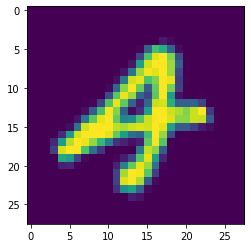

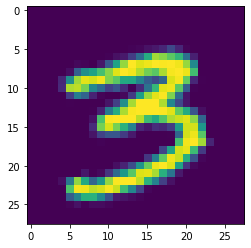

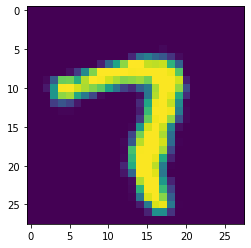

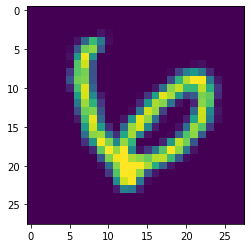

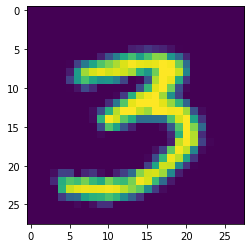

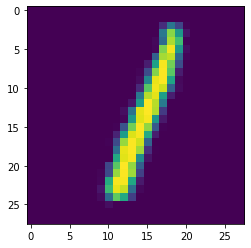

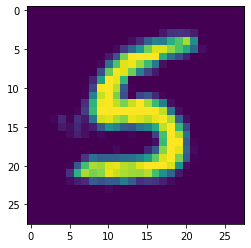

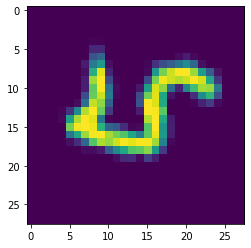

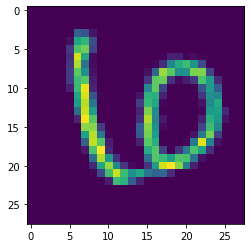

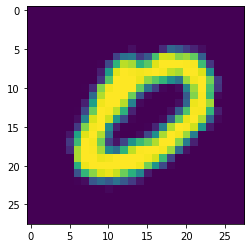

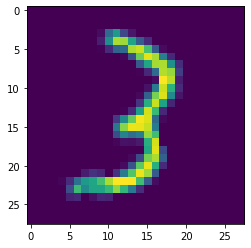

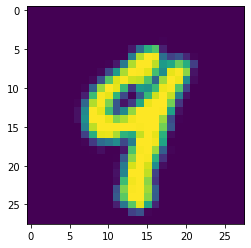

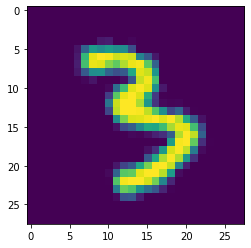

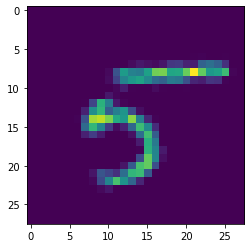

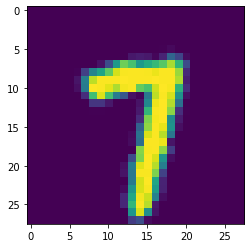

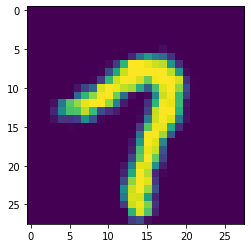

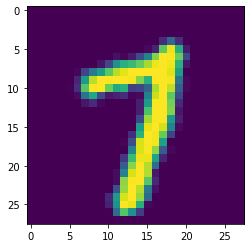

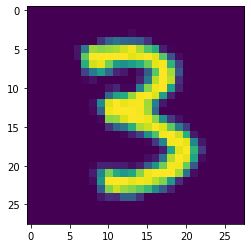

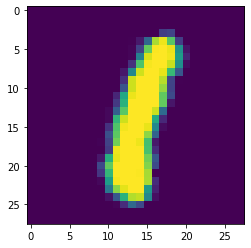

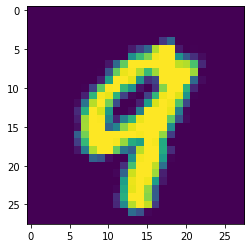

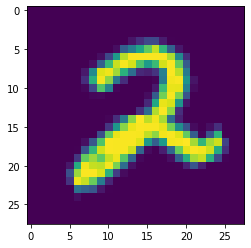

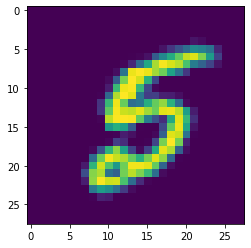

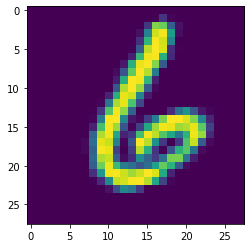

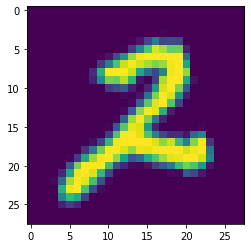

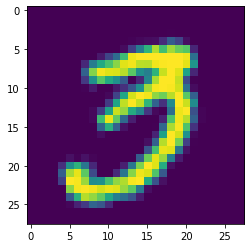

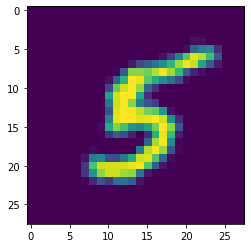

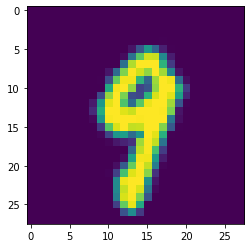

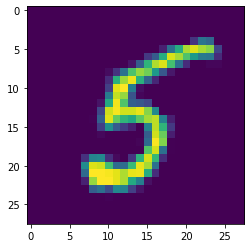

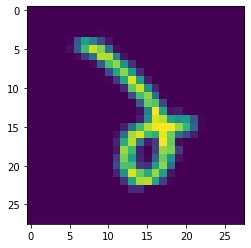

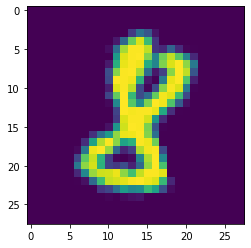

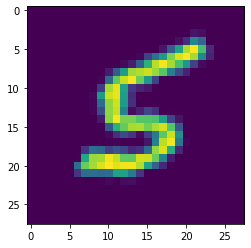

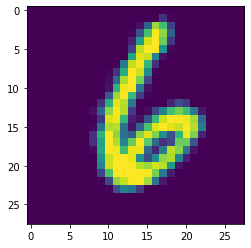

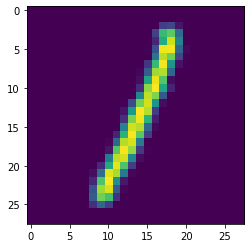

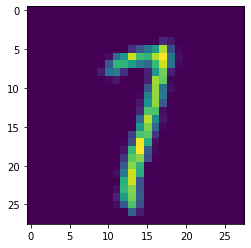

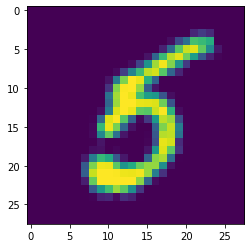

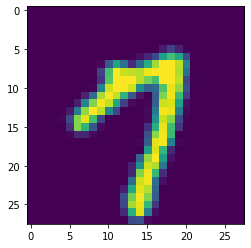

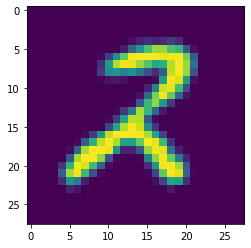

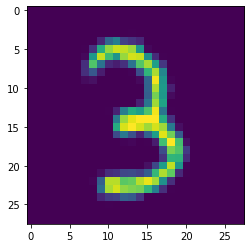

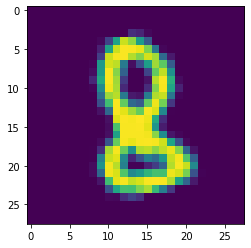

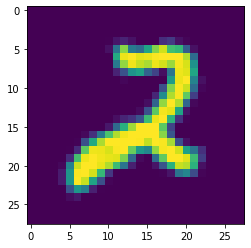

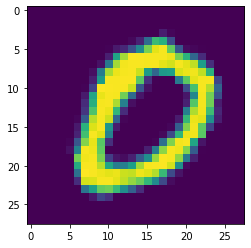

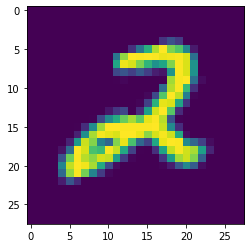

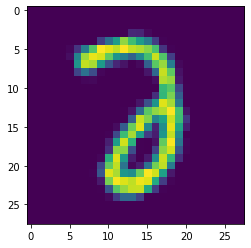

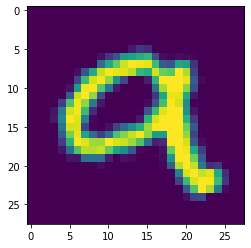

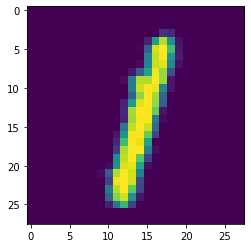

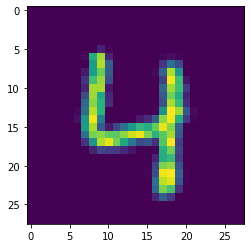

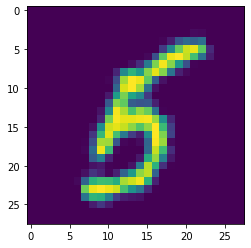

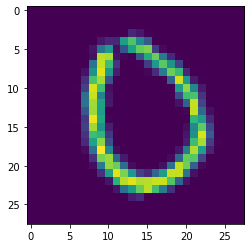

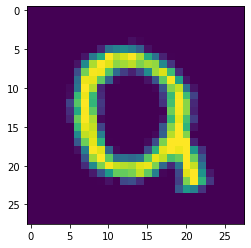

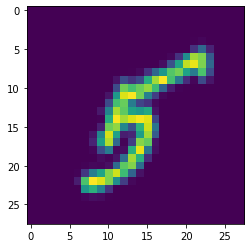

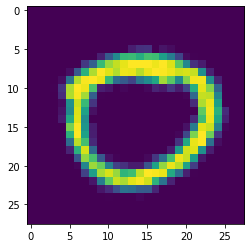

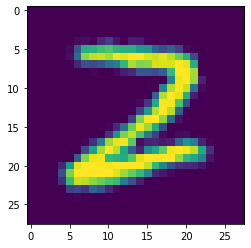

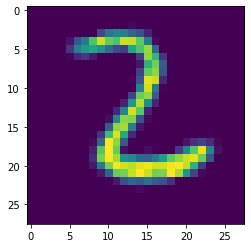

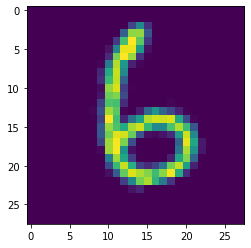

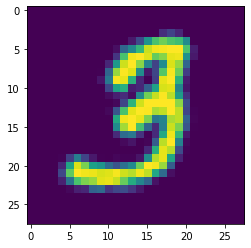

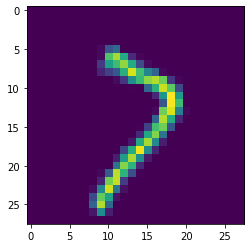

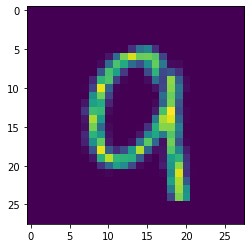

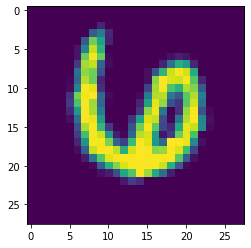

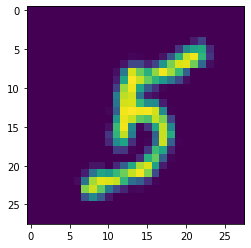

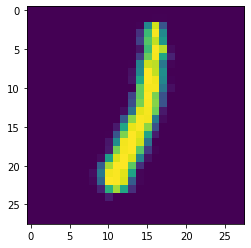

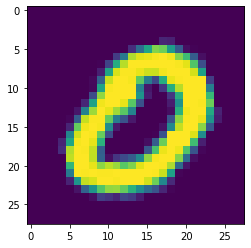

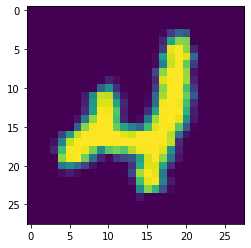

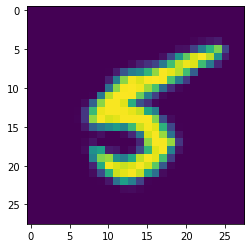

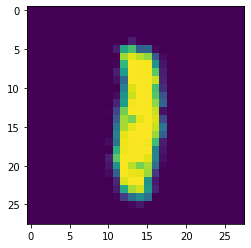

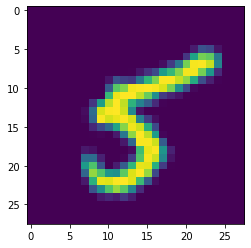

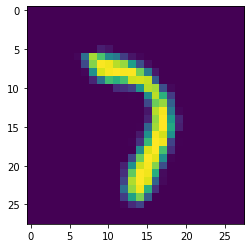

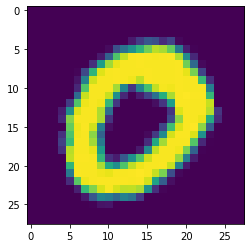

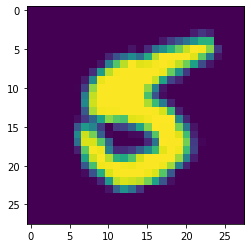

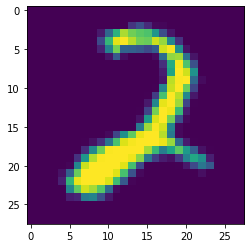

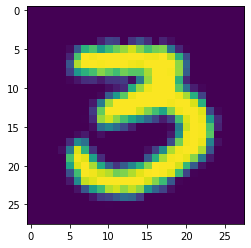

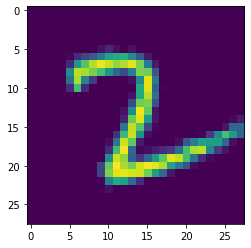

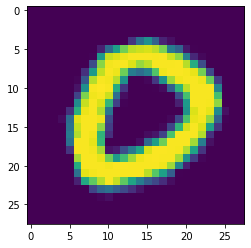

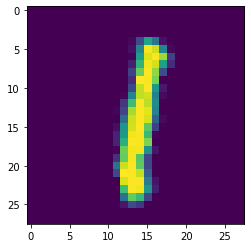

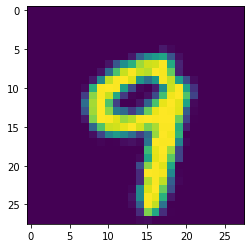

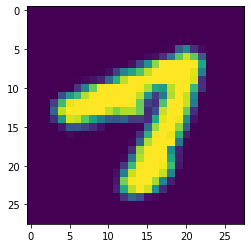

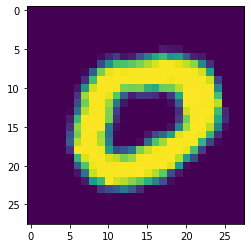

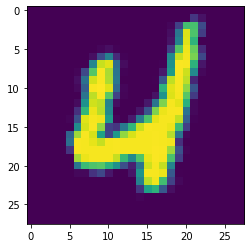

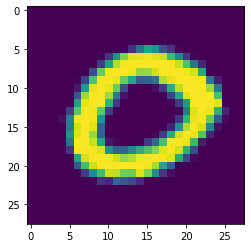

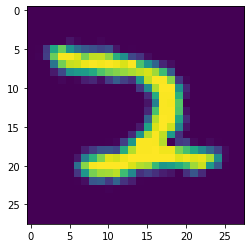

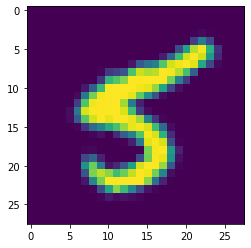

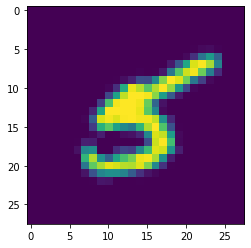

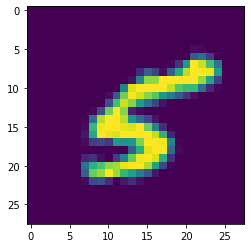

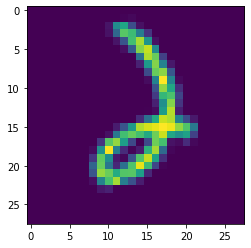

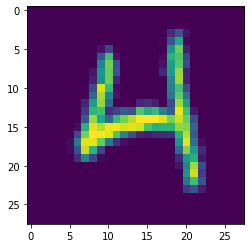

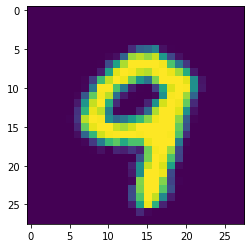

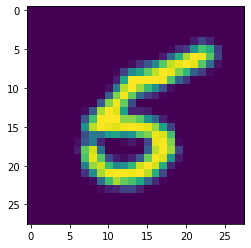

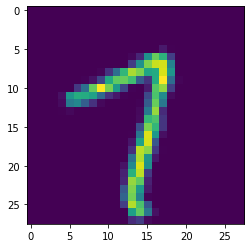

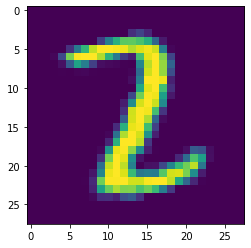

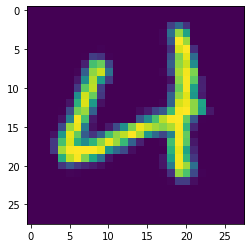

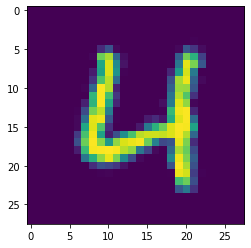

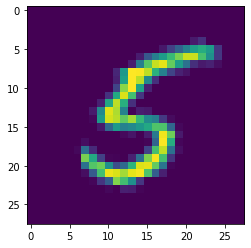

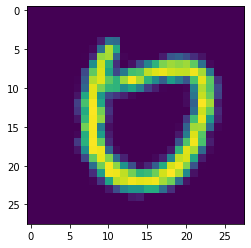

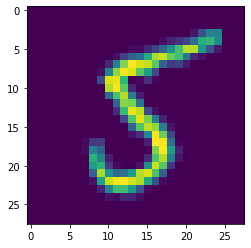

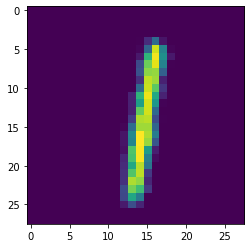

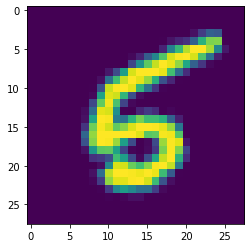

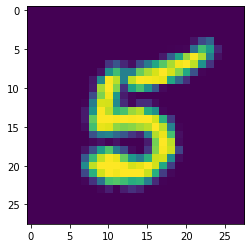

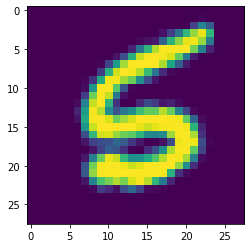

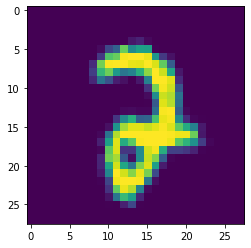

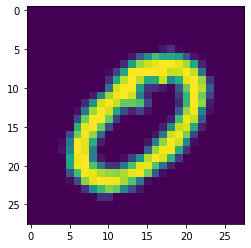

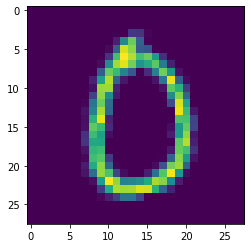

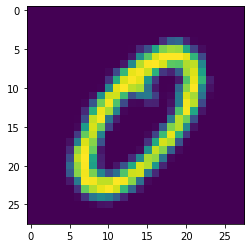

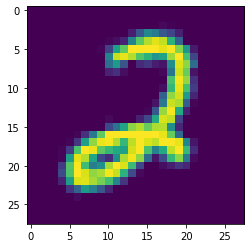

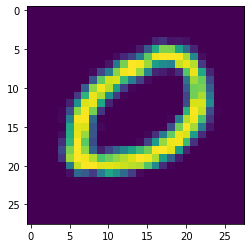

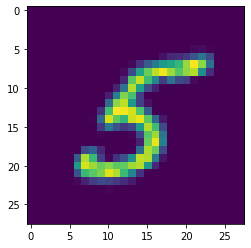

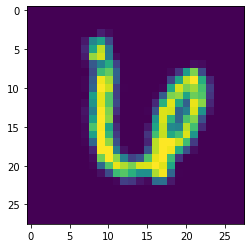

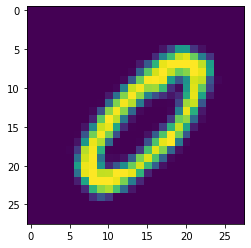

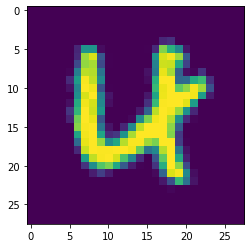

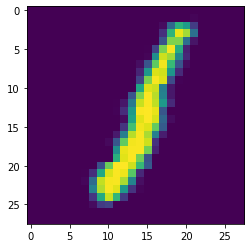

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
from data_utils import mnist_train_loader_func
data_loader = mnist_train_loader_func()
out = []
for batch_idx, (data, target) in enumerate(data_loader):
    if batch_idx > 100:
        break
    augmented, _, not_augmented, _ = RotationTransfomer(data)
    out = RotationClassifier(augmented)
    for index, label in enumerate(out):
        if label < 0.5:
            plt.imshow(augmented[index][0])
            plt.show()
            plt.close()